Importing Libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Reading the data

In [35]:
df=pd.read_excel('instagram_data.xlsx')

View the first 5 records

In [36]:
df.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,DATE,"TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,list_of_tags,number_of_tags,list_of_mentions,number_of_mentions
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2017-02-11 11:05:10,1,1,https://www.instagram.com/p/BQXZpSQjiPj,#newday #newera,2,NaN,0
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,2017-02-11 00:33:10,1,1,https://www.instagram.com/p/BQWRUV6j8b-,#goodnight #weekend #goodone,3,NaN,0
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,2017-02-09 15:51:47,1,3,https://www.instagram.com/p/BQSw2wMj0Bw,#tb #2007 #stous31dromous #megatv #greece #new...,7,NaN,0
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2017-02-08 18:21:57,1,3,https://www.instagram.com/p/BQQdPrLDeRz,#filming #mprousko4,2,@stamosts @kinolis2,2
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,2017-02-08 13:03:14,1,0,https://www.instagram.com/p/BQP4xY7jAXb,#lifelessons #andreasgeorgiou #tb #peru,4,NaN,0


Structure of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19681 entries, 0 to 19680
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   USERNAME               19681 non-null  object        
 1   FOLLOWERS              19681 non-null  int64         
 2   FOLLOWING              19681 non-null  int64         
 3   LIKES                  19681 non-null  int64         
 4   COMMENTS               19681 non-null  int64         
 5   TEXT                   19675 non-null  object        
 6   DATE                   19681 non-null  datetime64[ns]
 7   TYPE(1 PHOTO,2 VIDEO)  19681 non-null  int64         
 8   USERS IN PHOTO         19681 non-null  object        
 9   LINK                   19681 non-null  object        
 10  list_of_tags           13862 non-null  object        
 11  number_of_tags         19681 non-null  int64         
 12  list_of_mentions       6746 non-null   object        
 13  n

Total Records in the data frame

In [5]:
total_records = len(df)
print(f"Total records: {total_records}")

Total records: 19681


Numerical Columns

In [6]:
continuous_vars = [
    'FOLLOWERS', 'FOLLOWING', 'LIKES', 'COMMENTS', 
    'number_of_tags', 'number_of_mentions'
]

Descriptive Statistics

In [7]:
continuous_stats = df[continuous_vars].describe()
continuous_stats

,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,number_of_tags,number_of_mentions
count,1.968100e+04,19681.000000,19681.000000,19681.000000,19681.000000,19681.000000
mean,6.256413e+04,1489.766831,2497.766983,39.825111,6.737005,0.723591
std,1.042349e+05,2252.675356,5574.988136,447.972795,8.782144,1.704316
min,1.799300e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.329900e+04,174.000000,420.000000,1.000000,0.000000,0.000000
50%,3.669900e+04,506.000000,1073.000000,5.000000,3.000000,0.000000
75%,6.279100e+04,1367.000000,2683.000000,17.000000,10.000000,1.000000
max,1.134619e+06,7586.000000,158338.000000,26011.000000,41.000000,34.000000


Unique records in categorical columns

In [8]:
# List of categorical variables (columns)
categorical_vars = ['USERNAME', 'TEXT', 'DATE', 'USERS IN PHOTO', 'LINK', 'list_of_tags', 'list_of_mentions']

unique_counts = df[categorical_vars].nunique()
unique_counts_table = unique_counts.reset_index()
unique_counts_table.columns = ['Categorical Variable', 'Unique Count']
sorted_unique_counts_table = unique_counts_table.sort_values(by='Unique Count', ascending=True)
sorted_unique_counts_table

,Categorical Variable,Unique Count
3,USERS IN PHOTO,22
0,USERNAME,1094
6,list_of_mentions,4357
5,list_of_tags,9683
1,TEXT,17390
2,DATE,19538
4,LINK,19681


Checking null records

In [9]:
df.isnull().sum()

USERNAME                     0
FOLLOWERS                    0
FOLLOWING                    0
LIKES                        0
COMMENTS                     0
TEXT                         6
DATE                         0
TYPE(1 PHOTO,2 VIDEO)        0
USERS IN PHOTO               0
LINK                         0
list_of_tags              5819
number_of_tags               0
list_of_mentions         12935
number_of_mentions           0
dtype: int64

Checking duplicate records

In [11]:
df.duplicated().sum()

0

Dropping the null records in the TEXT column

In [37]:
df = df.dropna(subset=['TEXT'])

Checking null records

In [13]:
df.isnull().sum()

USERNAME                     0
FOLLOWERS                    0
FOLLOWING                    0
LIKES                        0
COMMENTS                     0
TEXT                         0
DATE                         0
TYPE(1 PHOTO,2 VIDEO)        0
USERS IN PHOTO               0
LINK                         0
list_of_tags              5813
number_of_tags               0
list_of_mentions         12929
number_of_mentions           0
dtype: int64

Dropping the columns which have null records (list of tags, list of mentions)

In [38]:
df = df.dropna(axis=1)

Checking the dataframe after the data cleaning step

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 19680
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   USERNAME               19675 non-null  object        
 1   FOLLOWERS              19675 non-null  int64         
 2   FOLLOWING              19675 non-null  int64         
 3   LIKES                  19675 non-null  int64         
 4   COMMENTS               19675 non-null  int64         
 5   TEXT                   19675 non-null  object        
 6   DATE                   19675 non-null  datetime64[ns]
 7   TYPE(1 PHOTO,2 VIDEO)  19675 non-null  int64         
 8   USERS IN PHOTO         19675 non-null  object        
 9   LINK                   19675 non-null  object        
 10  number_of_tags         19675 non-null  int64         
 11  number_of_mentions     19675 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 2.0+ MB


Creating the Month and Day of week column

In [39]:
df['Month'] = df['DATE'].dt.month
df['Day_of_Week'] = df['DATE'].dt.day_name()

Checking the records to see if the Columns are populated

In [9]:
df.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,DATE,"TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,number_of_tags,number_of_mentions,Month,Day_of_Week
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2017-02-11 11:05:10,1,1,https://www.instagram.com/p/BQXZpSQjiPj,2,0,2,Saturday
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,2017-02-11 00:33:10,1,1,https://www.instagram.com/p/BQWRUV6j8b-,3,0,2,Saturday
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,2017-02-09 15:51:47,1,3,https://www.instagram.com/p/BQSw2wMj0Bw,7,0,2,Thursday
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2017-02-08 18:21:57,1,3,https://www.instagram.com/p/BQQdPrLDeRz,2,2,2,Wednesday
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,2017-02-08 13:03:14,1,0,https://www.instagram.com/p/BQP4xY7jAXb,4,0,2,Wednesday


Creating the Post Timing Column to categorize the timings as Morning, Afternoon, Evening, Night

In [40]:
def categorize_timing(hour):
    if 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour <= 23 or 0 <= hour < 8:
        return 'Night'

df['Post_Timing'] = df['DATE'].dt.hour.apply(categorize_timing)

Creating the Text Length column which counts the total character in the row of each text column

In [41]:
df['Text_Length'] = df['TEXT'].apply(lambda x: len(x.strip()))

Checking the dataframe to see if the columns are created

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 19680
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   USERNAME               19675 non-null  object        
 1   FOLLOWERS              19675 non-null  int64         
 2   FOLLOWING              19675 non-null  int64         
 3   LIKES                  19675 non-null  int64         
 4   COMMENTS               19675 non-null  int64         
 5   TEXT                   19675 non-null  object        
 6   DATE                   19675 non-null  datetime64[ns]
 7   TYPE(1 PHOTO,2 VIDEO)  19675 non-null  int64         
 8   USERS IN PHOTO         19675 non-null  object        
 9   LINK                   19675 non-null  object        
 10  number_of_tags         19675 non-null  int64         
 11  number_of_mentions     19675 non-null  int64         
 12  Month                  19675 non-null  int32         
 13  Day_of

Renaming the USERS IN PHOTO column to Number of Users in Post
Replacing invalid values with 0
Changing the data type of the Number of Users in Post to integer data type

In [42]:
df.rename(columns={'USERS IN PHOTO': 'Number_of_Users_in_Post'}, inplace=True)
df['Number_of_Users_in_Post'] = df['Number_of_Users_in_Post'].replace('-', 0)
df['Number_of_Users_in_Post'] = df['Number_of_Users_in_Post'].astype(int)

Checking the data frame to see if the changes done are applied

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 19680
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   USERNAME                 19675 non-null  object        
 1   FOLLOWERS                19675 non-null  int64         
 2   FOLLOWING                19675 non-null  int64         
 3   LIKES                    19675 non-null  int64         
 4   COMMENTS                 19675 non-null  int64         
 5   TEXT                     19675 non-null  object        
 6   DATE                     19675 non-null  datetime64[ns]
 7   TYPE(1 PHOTO,2 VIDEO)    19675 non-null  int64         
 8   Number_of_Users_in_Post  19675 non-null  int32         
 9   LINK                     19675 non-null  object        
 10  number_of_tags           19675 non-null  int64         
 11  number_of_mentions       19675 non-null  int64         
 12  Month                    19675 non-nu

Checking unique values in the Month column

In [23]:
df['Month'].unique()

array([ 2,  1, 12, 11, 10,  9,  8,  7,  4,  5,  3])

Creating the Month Name column from the Month column

In [43]:
df['Month_Name'] = pd.to_datetime(df['Month'], format='%m').dt.month_name()

Checking unique values in the Day of week column

In [21]:
df['Day_of_Week'].unique()

array(['Saturday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Friday',
       'Sunday'], dtype=object)

Checking unique values in the Post Timing column

In [26]:
df['Post_Timing'].unique()

array(['Morning', 'Night', 'Afternoon', 'Evening'], dtype=object)

Checking unique values in the TYPE (PHOTO, VIDEO) column

In [27]:
df['TYPE(1 PHOTO,2 VIDEO)'].unique()

array([1, 2], dtype=int64)

Replacing 1 by photo and 2 by video in the TYPE column

In [44]:
df['TYPE(1 PHOTO,2 VIDEO)'] = df['TYPE(1 PHOTO,2 VIDEO)'].map({1: 'photo', 2: 'video'})

Checking the dataframe to see if the records are changed accordingly

In [23]:
df.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,DATE,"TYPE(1 PHOTO,2 VIDEO)",Number_of_Users_in_Post,LINK,number_of_tags,number_of_mentions,Month,Day_of_Week,Post_Timing,Text_Length,Month_Name
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2017-02-11 11:05:10,photo,1,https://www.instagram.com/p/BQXZpSQjiPj,2,0,2,Saturday,Morning,56,February
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,2017-02-11 00:33:10,photo,1,https://www.instagram.com/p/BQWRUV6j8b-,3,0,2,Saturday,Night,64,February
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,2017-02-09 15:51:47,photo,3,https://www.instagram.com/p/BQSw2wMj0Bw,7,0,2,Thursday,Afternoon,60,February
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2017-02-08 18:21:57,photo,3,https://www.instagram.com/p/BQQdPrLDeRz,2,2,2,Wednesday,Evening,103,February
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,2017-02-08 13:03:14,photo,0,https://www.instagram.com/p/BQP4xY7jAXb,4,0,2,Wednesday,Afternoon,91,February


Dummy Encoding of TYPE, Post Timing, Day of Week, Month Name columns

In [45]:
df = pd.get_dummies(df, columns=['TYPE(1 PHOTO,2 VIDEO)', 'Post_Timing', 'Day_of_Week', 'Month_Name'], drop_first=True)

Checking the dataframe for columns

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 19680
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   USERNAME                     19675 non-null  object        
 1   FOLLOWERS                    19675 non-null  int64         
 2   FOLLOWING                    19675 non-null  int64         
 3   LIKES                        19675 non-null  int64         
 4   COMMENTS                     19675 non-null  int64         
 5   TEXT                         19675 non-null  object        
 6   DATE                         19675 non-null  datetime64[ns]
 7   Number_of_Users_in_Post      19675 non-null  int32         
 8   LINK                         19675 non-null  object        
 9   number_of_tags               19675 non-null  int64         
 10  number_of_mentions           19675 non-null  int64         
 11  Month                        19675 non-null  i

Checking the records to see if they are populated in the column

In [32]:
df.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,DATE,Number_of_Users_in_Post,LINK,number_of_tags,...,Month_Name_August,Month_Name_December,Month_Name_February,Month_Name_January,Month_Name_July,Month_Name_March,Month_Name_May,Month_Name_November,Month_Name_October,Month_Name_September
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2017-02-11 11:05:10,1,https://www.instagram.com/p/BQXZpSQjiPj,2,...,False,False,True,False,False,False,False,False,False,False
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,2017-02-11 00:33:10,1,https://www.instagram.com/p/BQWRUV6j8b-,3,...,False,False,True,False,False,False,False,False,False,False
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,2017-02-09 15:51:47,3,https://www.instagram.com/p/BQSw2wMj0Bw,7,...,False,False,True,False,False,False,False,False,False,False
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2017-02-08 18:21:57,3,https://www.instagram.com/p/BQQdPrLDeRz,2,...,False,False,True,False,False,False,False,False,False,False
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,2017-02-08 13:03:14,0,https://www.instagram.com/p/BQP4xY7jAXb,4,...,False,False,True,False,False,False,False,False,False,False


Checking the dataframe columns

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 19680
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   USERNAME                     19675 non-null  object        
 1   FOLLOWERS                    19675 non-null  int64         
 2   FOLLOWING                    19675 non-null  int64         
 3   LIKES                        19675 non-null  int64         
 4   COMMENTS                     19675 non-null  int64         
 5   TEXT                         19675 non-null  object        
 6   DATE                         19675 non-null  datetime64[ns]
 7   Number_of_Users_in_Post      19675 non-null  int32         
 8   LINK                         19675 non-null  object        
 9   number_of_tags               19675 non-null  int64         
 10  number_of_mentions           19675 non-null  int64         
 11  Month                        19675 non-null  i

Converting the data type of the dummy encoded columns to integer data type

In [46]:
columns_to_convert = ['TYPE(1 PHOTO,2 VIDEO)_video','Post_Timing_Evening','Post_Timing_Morning','Post_Timing_Night','Day_of_Week_Monday','Day_of_Week_Saturday','Day_of_Week_Sunday', 'Day_of_Week_Thursday','Day_of_Week_Tuesday','Day_of_Week_Wednesday','Month_Name_August','Month_Name_December','Month_Name_February','Month_Name_January','Month_Name_July','Month_Name_March','Month_Name_May','Month_Name_November','Month_Name_October','Month_Name_September']
df[columns_to_convert] = df[columns_to_convert].astype(int)

Checking the dataframe to see if the columns are created appropriately

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 19680
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   USERNAME                     19675 non-null  object        
 1   FOLLOWERS                    19675 non-null  int64         
 2   FOLLOWING                    19675 non-null  int64         
 3   LIKES                        19675 non-null  int64         
 4   COMMENTS                     19675 non-null  int64         
 5   TEXT                         19675 non-null  object        
 6   DATE                         19675 non-null  datetime64[ns]
 7   Number_of_Users_in_Post      19675 non-null  int32         
 8   LINK                         19675 non-null  object        
 9   number_of_tags               19675 non-null  int64         
 10  number_of_mentions           19675 non-null  int64         
 11  Month                        19675 non-null  i

Checking the records of the dataframe

In [36]:
df.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,DATE,Number_of_Users_in_Post,LINK,number_of_tags,...,Month_Name_August,Month_Name_December,Month_Name_February,Month_Name_January,Month_Name_July,Month_Name_March,Month_Name_May,Month_Name_November,Month_Name_October,Month_Name_September
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2017-02-11 11:05:10,1,https://www.instagram.com/p/BQXZpSQjiPj,2,...,0,0,1,0,0,0,0,0,0,0
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,2017-02-11 00:33:10,1,https://www.instagram.com/p/BQWRUV6j8b-,3,...,0,0,1,0,0,0,0,0,0,0
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,2017-02-09 15:51:47,3,https://www.instagram.com/p/BQSw2wMj0Bw,7,...,0,0,1,0,0,0,0,0,0,0
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2017-02-08 18:21:57,3,https://www.instagram.com/p/BQQdPrLDeRz,2,...,0,0,1,0,0,0,0,0,0,0
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,2017-02-08 13:03:14,0,https://www.instagram.com/p/BQP4xY7jAXb,4,...,0,0,1,0,0,0,0,0,0,0


Renaming the TYPE (1 PHOTO, 2 VIDEO)_video to Type_video

In [47]:
df.rename(columns={'TYPE(1 PHOTO,2 VIDEO)_video': 'Type_video'}, inplace=True)

Scatter Plot of LIKES V/S FOLLOWERS

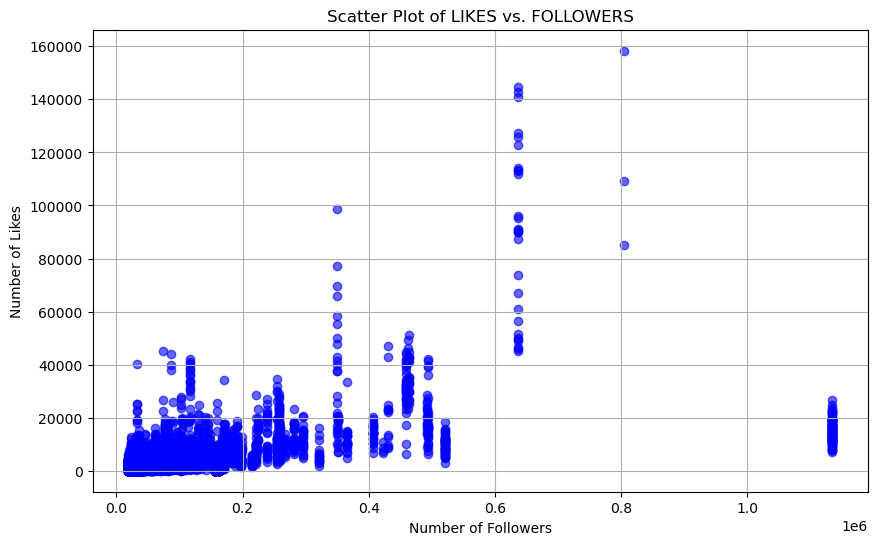

In [53]:
import matplotlib.pyplot as plt 

# Sets the figure size to 10 inches wide by 6 inches tal
plt.figure(figsize=(10, 6))

# Create a scatter plot of 'beds' (x-axis) vs 'price' (y-axis)
# 'color' sets the color of the points, and 'alpha' controls the transparency
plt.scatter(df['FOLLOWERS'], df['LIKES'],color='blue', alpha=0.6)

# Set the title of the plot and label the x- and y-axis
plt.title('Scatter Plot of LIKES vs. FOLLOWERS')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Likes')
plt.grid(True)

# Display the plot to the screen
plt.show()

Scatter Plot of LIKES V/S FOLLOWING

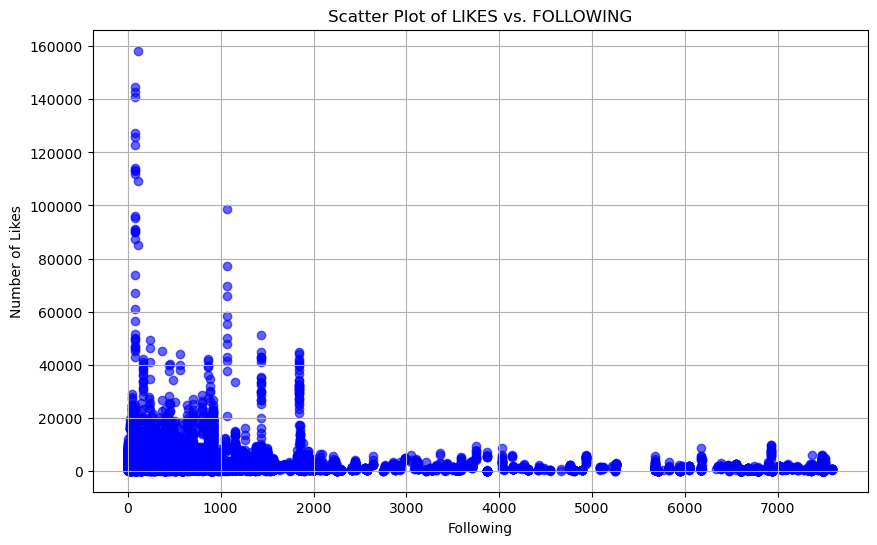

In [54]:
import matplotlib.pyplot as plt 

# Sets the figure size to 10 inches wide by 6 inches tal
plt.figure(figsize=(10, 6))

# Create a scatter plot of 'beds' (x-axis) vs 'price' (y-axis)
# 'color' sets the color of the points, and 'alpha' controls the transparency
plt.scatter(df['FOLLOWING'], df['LIKES'],color='blue', alpha=0.6)

# Set the title of the plot and label the x- and y-axis
plt.title('Scatter Plot of LIKES vs. FOLLOWING')
plt.xlabel('Following')
plt.ylabel('Number of Likes')
plt.grid(True)

# Display the plot to the screen
plt.show()

Scatter Plot of COMMENTS V/S FOLLOWERS

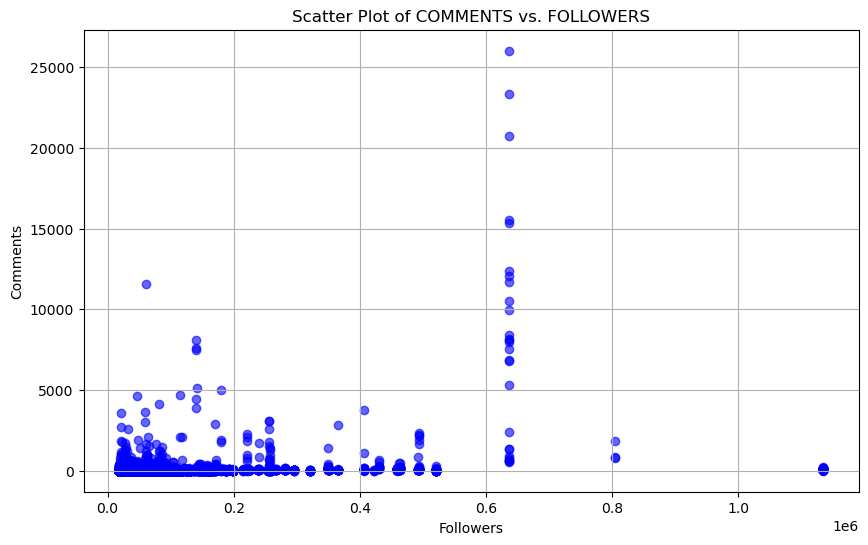

In [75]:
import matplotlib.pyplot as plt 

# Sets the figure size to 10 inches wide by 6 inches tal
plt.figure(figsize=(10, 6))

# Create a scatter plot of 'beds' (x-axis) vs 'price' (y-axis)
# 'color' sets the color of the points, and 'alpha' controls the transparency
plt.scatter(df['FOLLOWERS'], df['COMMENTS'],color='blue', alpha=0.6)

# Set the title of the plot and label the x- and y-axis
plt.title('Scatter Plot of COMMENTS vs. FOLLOWERS')
plt.xlabel('Followers')
plt.ylabel('Comments')
plt.grid(True)

# Display the plot to the screen
plt.show()

Scatter Plot of COMMENTS V/S FOLLOWING

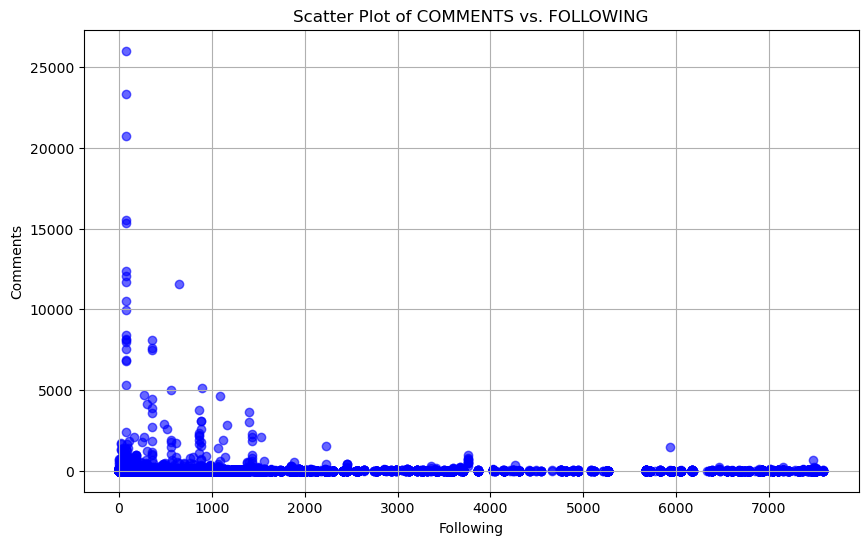

In [74]:
import matplotlib.pyplot as plt 

# Sets the figure size to 10 inches wide by 6 inches tal
plt.figure(figsize=(10, 6))

# Create a scatter plot of 'beds' (x-axis) vs 'price' (y-axis)
# 'color' sets the color of the points, and 'alpha' controls the transparency
plt.scatter(df['FOLLOWING'], df['COMMENTS'],color='blue', alpha=0.6)

# Set the title of the plot and label the x- and y-axis
plt.title('Scatter Plot of COMMENTS vs. FOLLOWING')
plt.xlabel('Following')
plt.ylabel('Comments')
plt.grid(True)

# Display the plot to the screen
plt.show()

Scatter Plot of LIKES V/S TEXT LENGTH

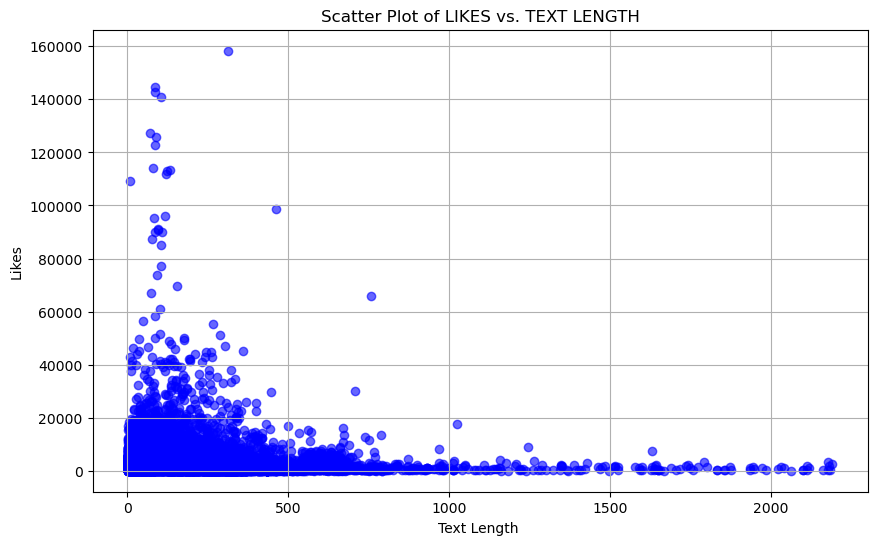

In [73]:
import matplotlib.pyplot as plt 

# Sets the figure size to 10 inches wide by 6 inches tal
plt.figure(figsize=(10, 6))

# Create a scatter plot of 'beds' (x-axis) vs 'price' (y-axis)
# 'color' sets the color of the points, and 'alpha' controls the transparency
plt.scatter(df['Text_Length'], df['LIKES'],color='blue', alpha=0.6)

# Set the title of the plot and label the x- and y-axis
plt.title('Scatter Plot of LIKES vs. TEXT LENGTH')
plt.xlabel('Text Length ')
plt.ylabel('Likes')
plt.grid(True)

# Display the plot to the screen
plt.show()

Scatter Plot of COMMENTS V/S TEXT LENGTH

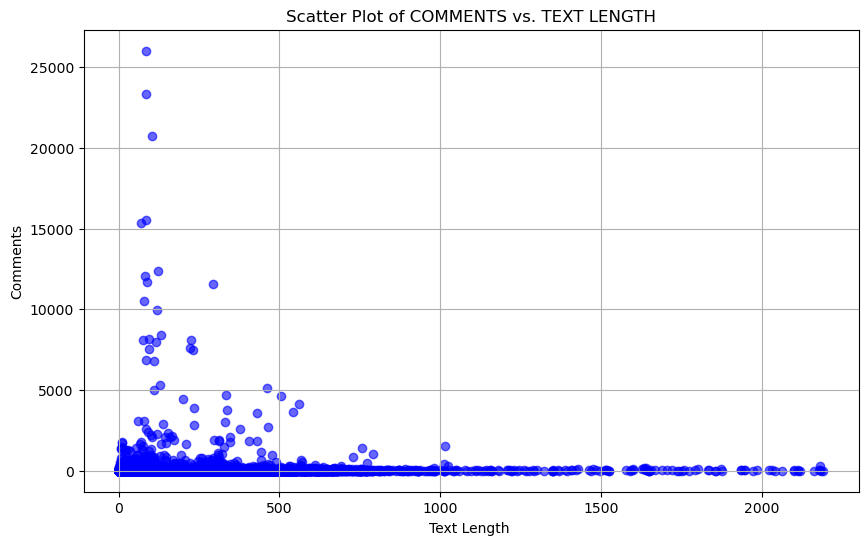

In [72]:
import matplotlib.pyplot as plt 

# Sets the figure size to 10 inches wide by 6 inches tal
plt.figure(figsize=(10, 6))

# Create a scatter plot of 'beds' (x-axis) vs 'price' (y-axis)
# 'color' sets the color of the points, and 'alpha' controls the transparency
plt.scatter(df['Text_Length'], df['COMMENTS'],color='blue', alpha=0.6)

# Set the title of the plot and label the x- and y-axis
plt.title('Scatter Plot of COMMENTS vs. TEXT LENGTH')
plt.xlabel('Text Length ')
plt.ylabel('Comments')
plt.grid(True)

# Display the plot to the screen
plt.show()

Scatter Plot of LIKES V/S Number of hashtags used in the post

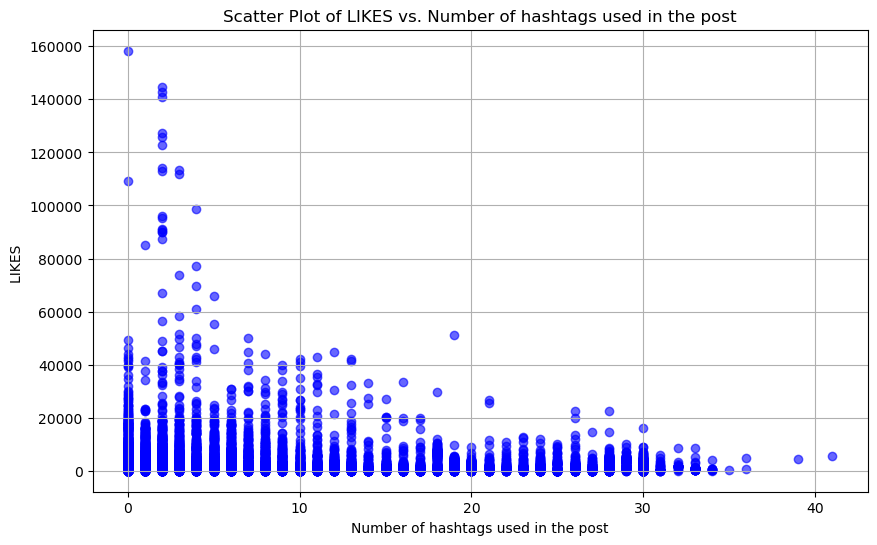

In [71]:
import matplotlib.pyplot as plt 

# Sets the figure size to 10 inches wide by 6 inches tal
plt.figure(figsize=(10, 6))

# Create a scatter plot of 'beds' (x-axis) vs 'price' (y-axis)
# 'color' sets the color of the points, and 'alpha' controls the transparency
plt.scatter(df['number_of_tags'], df['LIKES'],color='blue', alpha=0.6)

# Set the title of the plot and label the x- and y-axis
plt.title('Scatter Plot of LIKES vs. Number of hashtags used in the post')
plt.ylabel('LIKES ')
plt.xlabel('Number of hashtags used in the post')
plt.grid(True)

# Display the plot to the screen
plt.show()

Scattter Plot of COMMENTS V/S Number of hastags used in the post

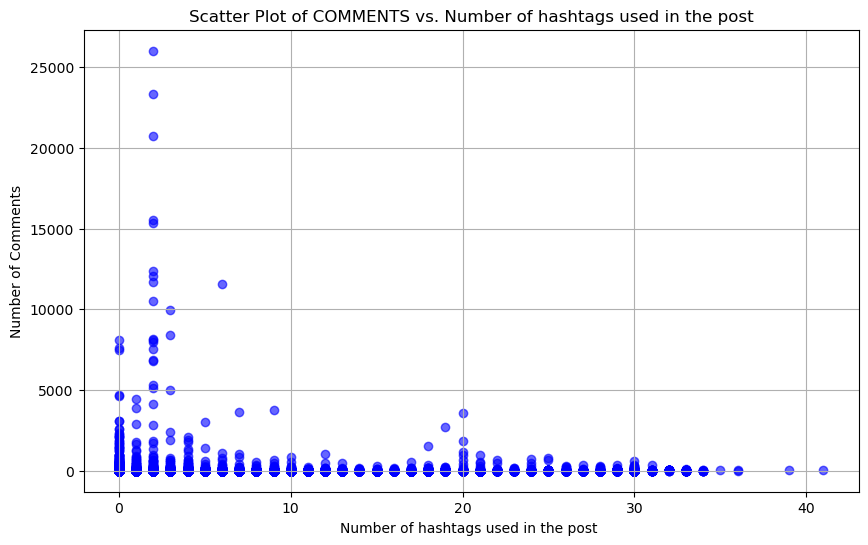

In [63]:
import matplotlib.pyplot as plt 

# Sets the figure size to 10 inches wide by 6 inches tal
plt.figure(figsize=(10, 6))

# Create a scatter plot of 'beds' (x-axis) vs 'price' (y-axis)
# 'color' sets the color of the points, and 'alpha' controls the transparency
plt.scatter(df['number_of_tags'], df['COMMENTS'],color='blue', alpha=0.6)

# Set the title of the plot and label the x- and y-axis
plt.title('Scatter Plot of COMMENTS vs. Number of hashtags used in the post')
plt.xlabel('Number of hashtags used in the post ')
plt.ylabel('Number of Comments')
plt.grid(True)

# Display the plot to the screen
plt.show()

Scatter Plot of LIKES V/S Number of Users in the Post

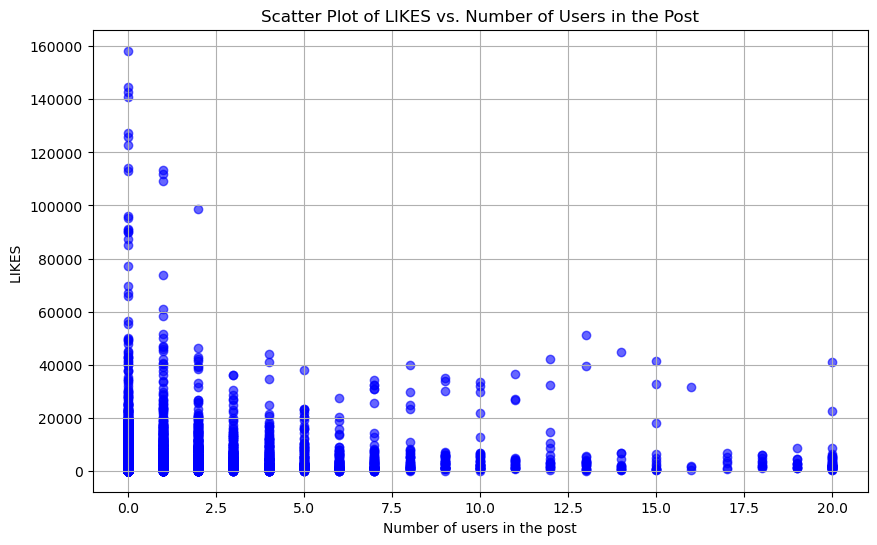

In [70]:
import matplotlib.pyplot as plt 

# Sets the figure size to 10 inches wide by 6 inches tal
plt.figure(figsize=(10, 6))

# Create a scatter plot of 'beds' (x-axis) vs 'price' (y-axis)
# 'color' sets the color of the points, and 'alpha' controls the transparency
plt.scatter(df['Number_of_Users_in_Post'], df['LIKES'],color='blue', alpha=0.6)

# Set the title of the plot and label the x- and y-axis
plt.title('Scatter Plot of LIKES vs. Number of Users in the Post')
plt.ylabel('LIKES ')
plt.xlabel('Number of users in the post')
plt.grid(True)

# Display the plot to the screen
plt.show()

Scatter Plot of COMMENTS V/S Number of Users in the Post

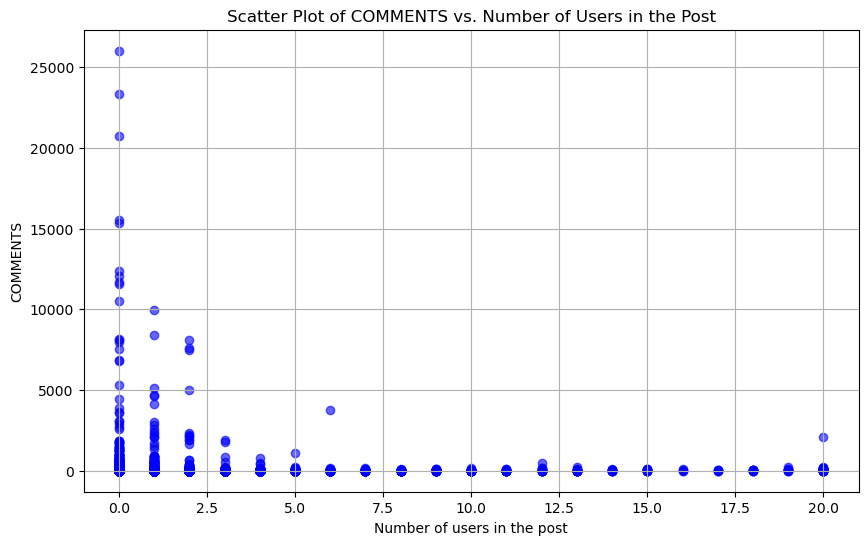

In [76]:
import matplotlib.pyplot as plt 

# Sets the figure size to 10 inches wide by 6 inches tal
plt.figure(figsize=(10, 6))

# Create a scatter plot of 'beds' (x-axis) vs 'price' (y-axis)
# 'color' sets the color of the points, and 'alpha' controls the transparency
plt.scatter(df['Number_of_Users_in_Post'], df['COMMENTS'],color='blue', alpha=0.6)

# Set the title of the plot and label the x- and y-axis
plt.title('Scatter Plot of COMMENTS vs. Number of Users in the Post')
plt.ylabel('COMMENTS')
plt.xlabel('Number of users in the post')
plt.grid(True)

# Display the plot to the screen
plt.show()

Scatter Plot of LIKES V/S Number of Mentions

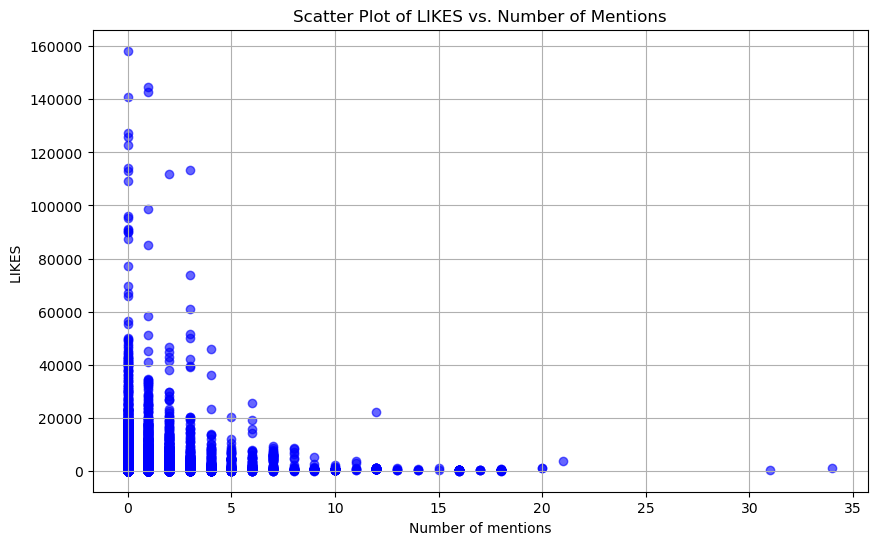

In [78]:
import matplotlib.pyplot as plt 

# Sets the figure size to 10 inches wide by 6 inches tal
plt.figure(figsize=(10, 6))

# Create a scatter plot of 'beds' (x-axis) vs 'price' (y-axis)
# 'color' sets the color of the points, and 'alpha' controls the transparency
plt.scatter(df['number_of_mentions'], df['LIKES'],color='blue', alpha=0.6)

# Set the title of the plot and label the x- and y-axis
plt.title('Scatter Plot of LIKES vs. Number of Mentions')
plt.ylabel('LIKES ')
plt.xlabel('Number of mentions')
plt.grid(True)

# Display the plot to the screen
plt.show()

Scatter Plot of COMMENTS V/S Number of Mentions

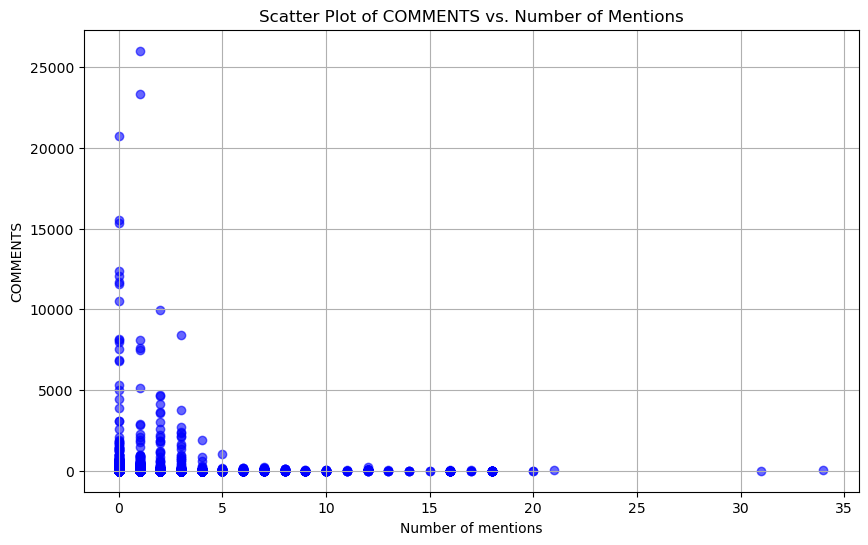

In [79]:
import matplotlib.pyplot as plt 

# Sets the figure size to 10 inches wide by 6 inches tal
plt.figure(figsize=(10, 6))

# Create a scatter plot of 'beds' (x-axis) vs 'price' (y-axis)
# 'color' sets the color of the points, and 'alpha' controls the transparency
plt.scatter(df['number_of_mentions'], df['COMMENTS'],color='blue', alpha=0.6)

# Set the title of the plot and label the x- and y-axis
plt.title('Scatter Plot of COMMENTS vs. Number of Mentions')
plt.ylabel('COMMENTS')
plt.xlabel('Number of mentions')
plt.grid(True)

# Display the plot to the screen
plt.show()

Outlier Removal (discard records which have z score outside of the -3 to +3 range)

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

columns_of_interest = [
    'FOLLOWERS', 'FOLLOWING', 'LIKES', 'COMMENTS',
    'Number_of_Users_in_Post', 'number_of_tags',
    'number_of_mentions', 'Text_Length'
]

z_scores = df[columns_of_interest].apply(zscore)

outlier_mask = (z_scores.abs() > 3).any(axis=1)

df_cleaned = df[~outlier_mask]

print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after outlier removal: {df_cleaned.shape[0]}")

Original number of rows: 19675
Number of rows after outlier removal: 18276


Correlation matrix

In [145]:
columns_for_correlation_matrix = df[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September']]
correlation_matrix = columns_for_correlation_matrix.corr()
correlation_matrix

,FOLLOWERS,FOLLOWING,Number_of_Users_in_Post,number_of_tags,number_of_mentions,Text_Length,Type_video,Post_Timing_Evening,Post_Timing_Morning,Post_Timing_Night,...,Month_Name_August,Month_Name_December,Month_Name_February,Month_Name_January,Month_Name_July,Month_Name_March,Month_Name_May,Month_Name_November,Month_Name_October,Month_Name_September
FOLLOWERS,1.000000,-0.093496,0.145211,-0.043321,-0.000932,-0.007532,-0.007427,0.001737,-0.015098,-0.015618,...,0.305785,0.039529,0.153487,0.228232,0.222446,-0.005591,-0.021694,0.222446,0.287220,0.385464
FOLLOWING,-0.093496,1.000000,0.021503,0.107250,0.102484,0.056984,-0.054276,-0.055901,0.010759,0.083858,...,-0.007506,-0.005398,-0.000046,-0.008688,-0.005460,0.000514,0.014776,-0.005460,-0.007050,-0.009462
Number_of_Users_in_Post,0.145211,0.021503,1.000000,0.112280,0.076426,0.084958,-0.099426,0.013546,-0.012141,-0.025900,...,0.002451,-0.001800,-0.001107,0.010644,-0.003118,-0.005147,-0.003442,0.025918,0.021403,0.051475
number_of_tags,-0.043321,0.107250,0.112280,1.000000,0.107736,0.602237,-0.005600,0.007898,-0.019475,0.066102,...,0.033767,-0.001508,-0.016149,-0.011340,0.017416,-0.003520,0.008890,-0.012626,-0.008195,-0.003276
number_of_mentions,-0.000932,0.102484,0.076426,0.107736,1.000000,0.279413,0.110804,-0.002946,-0.002453,0.039590,...,-0.010458,-0.005244,-0.011531,0.002315,-0.004901,-0.006770,0.000847,0.000677,-0.002006,0.005201
Text_Length,-0.007532,0.056984,0.084958,0.602237,0.279413,1.000000,0.032277,-0.003092,0.007051,0.043394,...,0.004088,-0.001325,-0.016318,-0.010335,0.005930,-0.006744,0.005063,-0.011668,-0.011553,-0.011648
Type_video,-0.007427,-0.054276,-0.099426,-0.005600,0.110804,0.032277,1.000000,0.024033,-0.013680,0.001728,...,-0.003712,-0.004025,-0.005742,-0.002751,-0.006972,-0.005196,0.003549,-0.006972,-0.009002,-0.012081
Post_Timing_Evening,0.001737,-0.055901,0.013546,0.007898,-0.002946,-0.003092,0.024033,1.000000,-0.214828,-0.450582,...,0.002726,-0.007202,0.004952,-0.003413,-0.001551,-0.009298,-0.019060,0.003911,0.005050,0.000467
Post_Timing_Morning,-0.015098,0.010759,-0.012141,-0.019475,-0.002453,0.007051,-0.013680,-0.214828,1.000000,-0.284635,...,-0.005500,0.008141,0.001740,-0.010176,0.006775,0.013788,0.045456,-0.000553,-0.010176,-0.000958
Post_Timing_Night,-0.015618,0.083858,-0.025900,0.066102,0.039590,0.043394,0.001728,-0.450582,-0.284635,1.000000,...,0.009457,-0.001034,-0.003848,0.016719,0.008035,-0.005728,-0.016885,0.003123,-0.002312,0.002573


VIF - Variance Inflation factor

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# 'X' contains the independent variables
X = df[[
    'FOLLOWERS', 'FOLLOWING',
    'Number_of_Users_in_Post', 'number_of_tags',
    'number_of_mentions', 'Text_Length'
]]

# Add a constant term to the model for the intercept
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                   Feature       VIF
0                    const  2.685209
1                FOLLOWERS  1.034455
2                FOLLOWING  1.030143
3  Number_of_Users_in_Post  1.041214
4           number_of_tags  1.609585
5       number_of_mentions  1.106235
6              Text_Length  1.695642


Linear regression - LIKES (Q1 - Unstandardized)

In [29]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV) and independent variables (IVs)
IVs = df[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September']]
DV = df[['LIKES']]

# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     590.0
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:41:11   Log-Likelihood:            -1.9194e+05
No. Observations:               19675   AIC:                         3.839e+05
Df Residuals:                   19648   BIC:                         3.841e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Linear regression - LIKES (Q1 - Standardized)

In [68]:
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = df[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September']]
DV = df[['LIKES']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     590.0
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:14:53   Log-Likelihood:                -22241.
No. Observations:               19675   AIC:                         4.454e+04
Df Residuals:                   19648   BIC:                         4.475e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -8

Bar Graph of statistically significant variables having influence on the LIKES

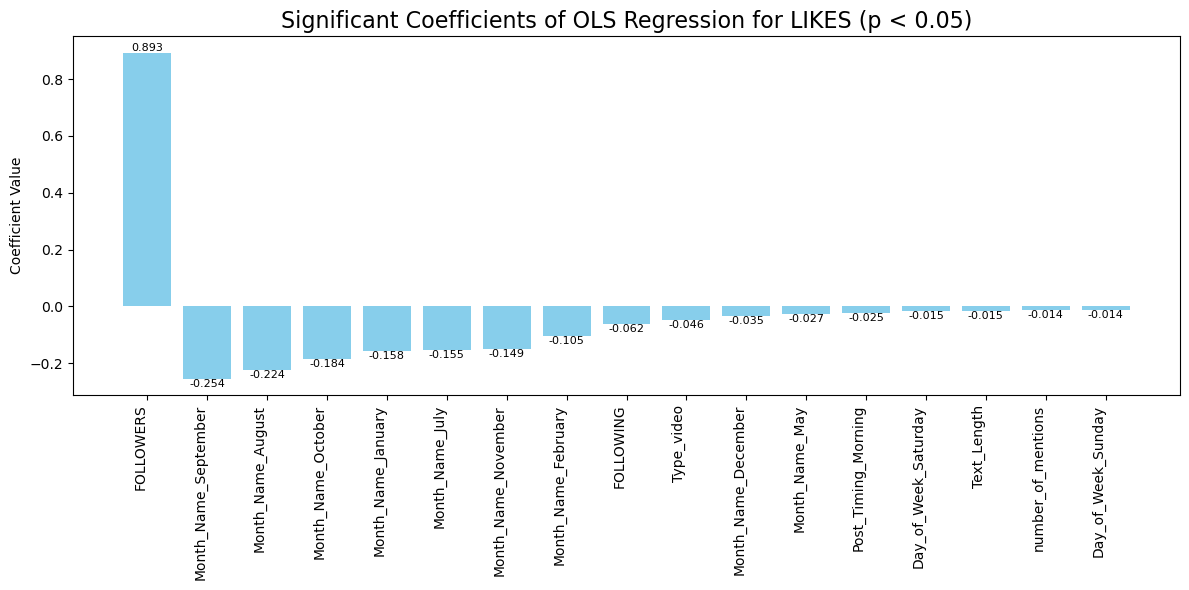

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Regression results data
data = {
    'Variable': ['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 
                 'number_of_mentions', 'Text_Length', 'Type_video', 'Post_Timing_Evening', 
                 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday', 
                 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 
                 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August', 
                 'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 
                 'Month_Name_July', 'Month_Name_March', 'Month_Name_May', 'Month_Name_November', 
                 'Month_Name_October', 'Month_Name_September'],
    'Coefficient': [0.8929, -0.0619, -0.0068, -0.0086, -0.0143, -0.0151, -0.0464, -0.0102, 
                    -0.0249, -0.0118, 0.0045, -0.0153, -0.0142, -0.0033, -0.0012, -0.0062, 
                    -0.2240, -0.0354, -0.1055, -0.1582, -0.1550, 0.0007, -0.0266, -0.1492, 
                    -0.1838, -0.2544],
    'P-Value': [0.000, 0.000, 0.217, 0.209, 0.012, 0.031, 0.000, 0.119, 0.000, 0.079, 
                0.555, 0.027, 0.042, 0.633, 0.856, 0.358, 0.000, 0.000, 0.000, 0.000, 
                0.000, 0.899, 0.000, 0.000, 0.000, 0.000]
}

# Convert data to DataFrame
coeff_likes = pd.DataFrame(data)

# Filter for statistically significant variables (P-value < 0.05)
df_significant = coeff_likes[coeff_likes['P-Value'] < 0.05]

# Sort by absolute coefficient values
df_significant = df_significant.reindex(df_significant['Coefficient'].abs().sort_values(ascending=False).index)

# Plot bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(df_significant['Variable'], df_significant['Coefficient'], color='skyblue')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel('Coefficient Value')
plt.title("Significant Coefficients of OLS Regression for LIKES (p < 0.05)", fontsize=16)
# Add labels to bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position: center of the bar
        height,  # Y position: top of the bar
        f'{height:.3f}',  # Label text with 3 decimal places
        ha='center',  # Horizontal alignment
        va='bottom' if height > 0 else 'top',  # Vertical alignment
        fontsize=8  # Font size
    )

plt.tight_layout()
plt.show()

Linear Regression - COMMENTS (Q1 - Unstandardized)

In [26]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV) and independent variables (IVs)
IVs = df[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September']]
DV = df[['COMMENTS']]

# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     57.08
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          5.40e-286
Time:                        21:24:28   Log-Likelihood:            -1.4731e+05
No. Observations:               19675   AIC:                         2.947e+05
Df Residuals:                   19648   BIC:                         2.949e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Linear Regression - COMMENTS (Q1 - Standardized)

In [156]:
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = df[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September']]
DV = df[['COMMENTS']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     57.08
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          5.40e-286
Time:                        10:48:43   Log-Likelihood:                -27201.
No. Observations:               19675   AIC:                         5.446e+04
Df Residuals:                   19648   BIC:                         5.467e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7

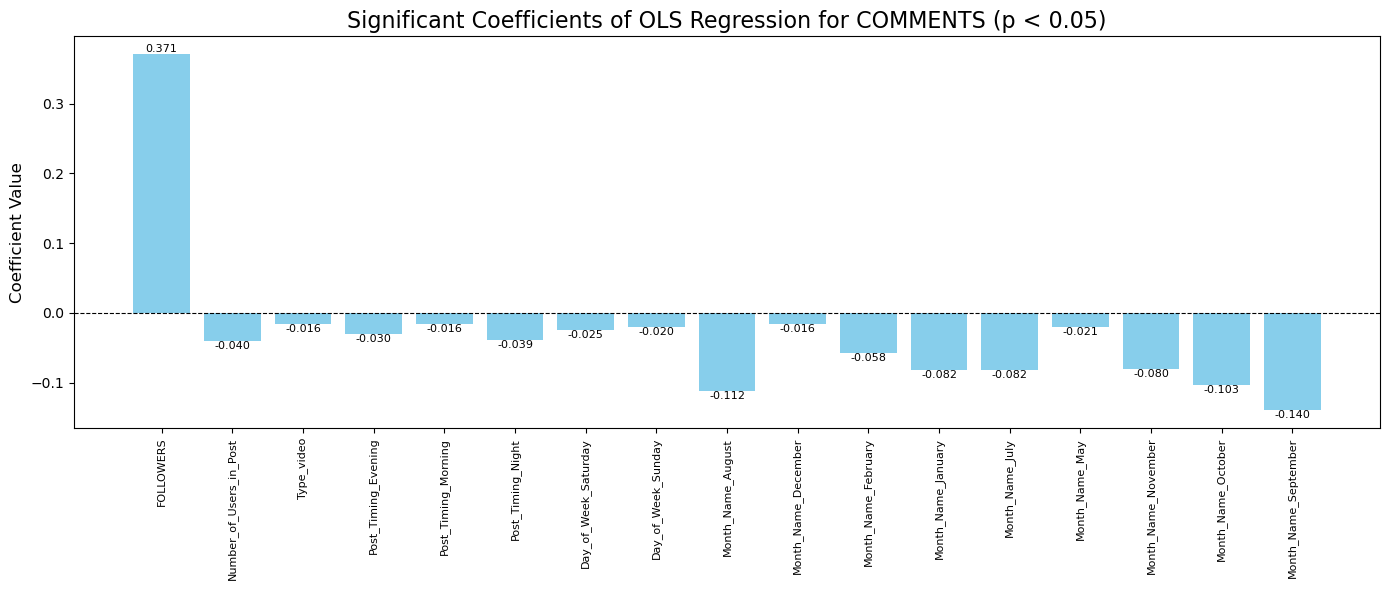

In [33]:
import matplotlib.pyplot as plt

# Data: Features, coefficients, and p-values
features = [
    "FOLLOWERS", "FOLLOWING", "Number_of_Users_in_Post", "number_of_tags",
    "number_of_mentions", "Text_Length", "Type_video", "Post_Timing_Evening",
    "Post_Timing_Morning", "Post_Timing_Night", "Day_of_Week_Monday",
    "Day_of_Week_Saturday", "Day_of_Week_Sunday", "Day_of_Week_Thursday",
    "Day_of_Week_Wednesday", "Day_of_Week_Tuesday", "Month_Name_August",
    "Month_Name_December", "Month_Name_February", "Month_Name_January",
    "Month_Name_July", "Month_Name_March", "Month_Name_May",
    "Month_Name_November", "Month_Name_October", "Month_Name_September"
]
coefficients = [
    0.3708, -0.0021, -0.0403, -0.0120, 0.0013, 0.0166, -0.0158, -0.0300,
    -0.0158, -0.0386, 0.0077, -0.0252, -0.0204, -0.0149, -0.0126, -0.0108,
    -0.1123, -0.0157, -0.0575, -0.0824, -0.0821, -0.000057, -0.0206,
    -0.0803, -0.1035, -0.1399
]
p_values = [
    0.000, 0.765, 0.000, 0.173, 0.862, 0.064, 0.023, 0.000,
    0.044, 0.000, 0.430, 0.005, 0.023, 0.097, 0.137, 0.211,
    0.000, 0.023, 0.000, 0.000, 0.000, 0.993, 0.010,
    0.000, 0.000, 0.000
]

# Filter features, coefficients, and p-values based on the threshold
significant_threshold = 0.05
significant_features = [features[i] for i in range(len(features)) if p_values[i] < significant_threshold]
significant_coefficients = [coefficients[i] for i in range(len(features)) if p_values[i] < significant_threshold]

# Create a vertical bar graph
plt.figure(figsize=(14, 6))
bars = plt.bar(significant_features, significant_coefficients, color="skyblue")

# Adding labels and title
plt.ylabel("Coefficient Value", fontsize=12)
plt.title("Significant Coefficients of OLS Regression for COMMENTS (p < 0.05)", fontsize=16)
plt.axhline(y=0, color="black", linewidth=0.8, linestyle="--")
plt.xticks(rotation=90, fontsize=8)

# Add values to bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.3f}',
             ha='center', va='bottom' if bar.get_height() > 0 else 'top', fontsize=8)

# Display the plot
plt.tight_layout()
plt.show()


Creating a new dataframe so that we can preserve the old one and add new columns

In [48]:
df_new=df

Creating the question mark count column

In [50]:
df_new['question_mark_count'] = df_new['TEXT'].str.count(r'\?')

Creating the exclamation mark count column

In [51]:
df_new['exclamation_mark_count'] = df_new['TEXT'].str.count(r'\!')

Checking the new dataframe for the columns created

In [52]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 19680
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   USERNAME                 19675 non-null  object        
 1   FOLLOWERS                19675 non-null  int64         
 2   FOLLOWING                19675 non-null  int64         
 3   LIKES                    19675 non-null  int64         
 4   COMMENTS                 19675 non-null  int64         
 5   TEXT                     19675 non-null  object        
 6   DATE                     19675 non-null  datetime64[ns]
 7   Number_of_Users_in_Post  19675 non-null  int32         
 8   LINK                     19675 non-null  object        
 9   number_of_tags           19675 non-null  int64         
 10  number_of_mentions       19675 non-null  int64         
 11  Month                    19675 non-null  int32         
 12  Text_Length              19675 non-nu

Using the regular expression library in python to make the engagement keywords count column

In [53]:
import re

engagement_keywords = [
    'love', 'amazing', 'incredible', 'awesome', 'fantastic', 'beautiful', 'wonderful', 'perfect', 
    'stunning', 'jaw-dropping', 'heartwarming', 'inspiring', 'exciting', 'powerful', 'fun', 
    'comment', 'share', 'like', 'follow', 'tag', 'subscribe', 'join', 'click', 'swipe', 'check', 
    'explore', 'recommend', 'vote', 'participate', 'donate', 'challenge', 'contest', 'win',
    'reply', 'respond', 'engage', 'message', 'interact', 'shoutout', 'mention', 'post', 'update', 
    'buzz', 'reaction', 'spotlight', 'feature', 'giveaway', 'free', 'discount', 'exclusive', 
    'special', 'deal', 'offer', 'price', 'sale', 'coupon', 'access', 'invitation', 'limited',
    'please', 'help', 'support', 'favor', 'contribute', 'spread', 'share', 'like', 'comment', 
    '#love', '#instagood', '#follow', '#likeforlike', '#commentforcomment', '#explorepage', 
    '#foryou', '#igers', '#viral', '#fashion', '#style', '#cute', '#funny', '#fitness', '#motivation'
]

df_new['engagement_keywords_count'] = df_new['TEXT'].apply(lambda x: sum([1 for word in engagement_keywords if re.search(r'\b' + re.escape(word) + r'\b', x, re.IGNORECASE)]))
df_new['engagement_keywords_count'].unique()

array([0, 1, 2, 3, 4, 5, 6, 8, 7, 9], dtype=int64)

Using the regular expression library in python to make the emoji count column

In [54]:
import re

# List of emojis related to engagement
engagement_emojis = [
    '❤️', '🧡', '💛', '💚', '💙', '💜', '🖤', '🤍', '💖', '💘', '💝', '💗', '💓', '💞', '💕', 
    '😊', '😁', '😍', '😋', '😃', '🤩', '😎', '🙌', '✨', '🌟', '🌈', '🤗', '💪', '🥳', '🎉', 
    '🥰', '🌸', '👏', '🏆', '🎯', '🥇', '💥', '🔥', '💯', '💬', '🎉', '🎈', '🏅', '🎁', '🏆', 
    '🎶', '🌟', '🥂', '🍾', '😘', '😽', '💋', '🥰', '💖', '💕', '💑', '👩‍❤️‍👩', '👨‍❤️‍👨', 
    '🚀', '🌍', '🌎', '🌏', '🔥', '✨', '📸', '🎥', '🏖️', '📝', '📲', '📢', '🔔', '🛎️', '🔑', 
    '🚨', '🏁', '🆗', '⬇️'
]

# Create a new column that counts the occurrence of any engagement-related emojis in the TEXT column, case-insensitive
df_new['emoji_count'] = df_new['TEXT'].apply(lambda x: sum([1 for emoji in engagement_emojis if emoji in x]))

# Display the updated dataframe with the new column
df_new['emoji_count'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

Checking the dataframe for the new columns

In [55]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 19680
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   USERNAME                   19675 non-null  object        
 1   FOLLOWERS                  19675 non-null  int64         
 2   FOLLOWING                  19675 non-null  int64         
 3   LIKES                      19675 non-null  int64         
 4   COMMENTS                   19675 non-null  int64         
 5   TEXT                       19675 non-null  object        
 6   DATE                       19675 non-null  datetime64[ns]
 7   Number_of_Users_in_Post    19675 non-null  int32         
 8   LINK                       19675 non-null  object        
 9   number_of_tags             19675 non-null  int64         
 10  number_of_mentions         19675 non-null  int64         
 11  Month                      19675 non-null  int32         
 12  Text_Leng

Correlation matrix

In [36]:
columns_for_correlation_matrix = df_new[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count', 'engagement_keywords_count', 'emoji_count']]
correlation_matrix = columns_for_correlation_matrix.corr()
correlation_matrix

,FOLLOWERS,FOLLOWING,Number_of_Users_in_Post,number_of_tags,number_of_mentions,Text_Length,Type_video,Post_Timing_Evening,Post_Timing_Morning,Post_Timing_Night,...,Month_Name_January,Month_Name_July,Month_Name_March,Month_Name_May,Month_Name_November,Month_Name_October,Month_Name_September,question_mark_count,engagement_keywords_count,emoji_count
FOLLOWERS,1.000000,-0.093496,0.145211,-0.043321,-0.000932,-0.007532,-0.007427,0.001737,-0.015098,-0.015618,...,0.228232,0.222446,-0.005591,-0.021694,0.222446,0.287220,0.385464,-0.044039,0.002734,-0.009812
FOLLOWING,-0.093496,1.000000,0.021503,0.107250,0.102484,0.056984,-0.054276,-0.055901,0.010759,0.083858,...,-0.008688,-0.005460,0.000514,0.014776,-0.005460,-0.007050,-0.009462,0.030003,0.052091,-0.024599
Number_of_Users_in_Post,0.145211,0.021503,1.000000,0.112280,0.076426,0.084958,-0.099426,0.013546,-0.012141,-0.025900,...,0.010644,-0.003118,-0.005147,-0.003442,0.025918,0.021403,0.051475,0.024505,0.067118,0.041293
number_of_tags,-0.043321,0.107250,0.112280,1.000000,0.107736,0.602237,-0.005600,0.007898,-0.019475,0.066102,...,-0.011340,0.017416,-0.003520,0.008890,-0.012626,-0.008195,-0.003276,0.133918,0.396670,0.075297
number_of_mentions,-0.000932,0.102484,0.076426,0.107736,1.000000,0.279413,0.110804,-0.002946,-0.002453,0.039590,...,0.002315,-0.004901,-0.006770,0.000847,0.000677,-0.002006,0.005201,0.155970,0.094327,0.015842
Text_Length,-0.007532,0.056984,0.084958,0.602237,0.279413,1.000000,0.032277,-0.003092,0.007051,0.043394,...,-0.010335,0.005930,-0.006744,0.005063,-0.011668,-0.011553,-0.011648,0.194904,0.326648,0.079328
Type_video,-0.007427,-0.054276,-0.099426,-0.005600,0.110804,0.032277,1.000000,0.024033,-0.013680,0.001728,...,-0.002751,-0.006972,-0.005196,0.003549,-0.006972,-0.009002,-0.012081,-0.001586,-0.047633,-0.031936
Post_Timing_Evening,0.001737,-0.055901,0.013546,0.007898,-0.002946,-0.003092,0.024033,1.000000,-0.214828,-0.450582,...,-0.003413,-0.001551,-0.009298,-0.019060,0.003911,0.005050,0.000467,-0.004083,0.021948,-0.002971
Post_Timing_Morning,-0.015098,0.010759,-0.012141,-0.019475,-0.002453,0.007051,-0.013680,-0.214828,1.000000,-0.284635,...,-0.010176,0.006775,0.013788,0.045456,-0.000553,-0.010176,-0.000958,-0.018319,0.017968,0.001938
Post_Timing_Night,-0.015618,0.083858,-0.025900,0.066102,0.039590,0.043394,0.001728,-0.450582,-0.284635,1.000000,...,0.016719,0.008035,-0.005728,-0.016885,0.003123,-0.002312,0.002573,0.036754,-0.022956,0.006212


Linear Regression - LIKES (Q2 Unstandardized)

In [37]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV) and independent variables (IVs)
IVs = df_new[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count','engagement_keywords_count','emoji_count','exclamation_mark_count']]
DV = df_new[['LIKES']]

# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     512.8
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:32:22   Log-Likelihood:            -1.9192e+05
No. Observations:               19675   AIC:                         3.839e+05
Df Residuals:                   19644   BIC:                         3.842e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Linear Regression - COMMENTS (Q2 Unstandardized)

In [41]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV) and independent variables (IVs)
IVs = df_new[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count','exclamation_mark_count','engagement_keywords_count','emoji_count']]
DV = df_new[['COMMENTS']]

# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     57.88
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:52:46   Log-Likelihood:            -1.4720e+05
No. Observations:               19675   AIC:                         2.945e+05
Df Residuals:                   19644   BIC:                         2.947e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Linear Regression - LIKES (Q2 standardized)

In [239]:
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = df_new[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count','exclamation_mark_count','engagement_keywords_count','emoji_count']]
DV = df_new[['LIKES']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     512.8
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:34:17   Log-Likelihood:                -22228.
No. Observations:               19675   AIC:                         4.452e+04
Df Residuals:                   19644   BIC:                         4.476e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

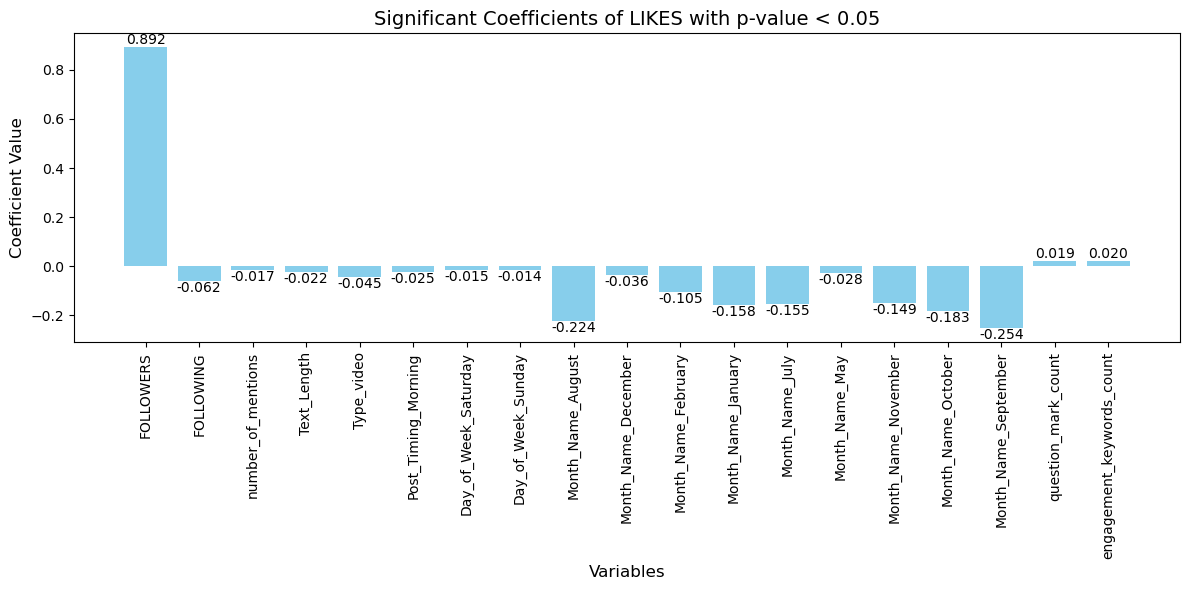

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame representing regression results for the LIKES model
data = {
    "Variable": [
        "FOLLOWERS", "FOLLOWING", "Number_of_Users_in_Post", "number_of_tags",
        "number_of_mentions", "Text_Length", "Type_video", "Post_Timing_Evening", "Post_Timing_Morning",
        "Post_Timing_Night", "Day_of_Week_Monday", "Day_of_Week_Saturday", "Day_of_Week_Sunday",
        "Day_of_Week_Thursday", "Day_of_Week_Wednesday", "Day_of_Week_Tuesday", "Month_Name_August",
        "Month_Name_December", "Month_Name_February", "Month_Name_January", "Month_Name_July",
        "Month_Name_March", "Month_Name_May", "Month_Name_November", "Month_Name_October",
        "Month_Name_September", "question_mark_count", "exclamation_mark_count",
        "engagement_keywords_count", "emoji_count"
    ],
    "coef": [
        0.8919, -0.0620, -0.0069, -0.0137, -0.0171, -0.0225, -0.0453, -0.0103,
        -0.0248, -0.0108, 0.0048, -0.0150, -0.0140, -0.0028, -0.0006, -0.0058, -0.2235,
        -0.0356, -0.1051, -0.1578, -0.1550, 0.0004, -0.0275, -0.1489, -0.1832, -0.2539,
        0.0190, 0.0089, 0.0203, -0.0069
    ],
    "p_value": [
        0.000, 0.000, 0.212, 0.055, 0.003, 0.002, 0.000, 0.117, 0.000, 0.107, 0.526,
        0.030, 0.045, 0.693, 0.923, 0.392, 0.000, 0.000, 0.000, 0.000, 0.000, 0.944, 0.000,
        0.000, 0.000, 0.000, 0.001, 0.109, 0.001, 0.216
    ]
}

LIKES = pd.DataFrame(data)

# Filter coefficients with p-value < 0.05
significant_df = LIKES[LIKES["p_value"] < 0.05]

plt.figure(figsize=(12, 6))
bars = plt.bar(significant_df["Variable"], significant_df["coef"], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f"{yval:.3f}",
        ha='center',
        va='bottom' if yval > 0 else 'top',
        fontsize=10
    )

# Create the bar graph
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.title("Significant Coefficients of LIKES with p-value < 0.05", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

Linear Regression - COMMENTS (Q2 Standardized)

In [38]:
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = df[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count','engagement_keywords_count','emoji_count', 'exclamation_mark_count']]
DV = df[['COMMENTS']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     57.88
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:49:30   Log-Likelihood:                -27084.
No. Observations:               19675   AIC:                         5.423e+04
Df Residuals:                   19644   BIC:                         5.448e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

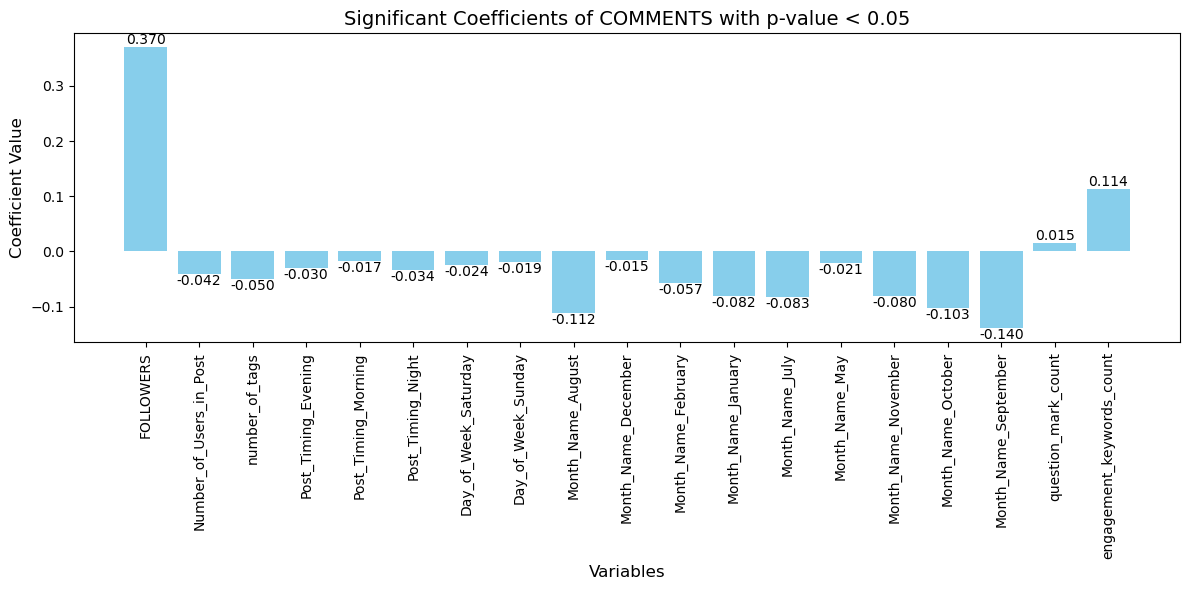

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Data representing the regression results
data = {
    "Variable": [
        "FOLLOWERS", "FOLLOWING", "Number_of_Users_in_Post", "number_of_tags",
        "number_of_mentions", "Text_Length", "Type_video", "Post_Timing_Evening", "Post_Timing_Morning",
        "Post_Timing_Night", "Day_of_Week_Monday", "Day_of_Week_Saturday", "Day_of_Week_Sunday",
        "Day_of_Week_Thursday", "Day_of_Week_Wednesday", "Day_of_Week_Tuesday", "Month_Name_August",
        "Month_Name_December", "Month_Name_February", "Month_Name_January", "Month_Name_July",
        "Month_Name_March", "Month_Name_May", "Month_Name_November", "Month_Name_October",
        "Month_Name_September", "question_mark_count", "exclamation_mark_count",
        "engagement_keywords_count", "emoji_count"
    ],
    "coef": [
        0.3696, -0.0036, -0.0415, -0.0504, -0.0037, 0.0023, -0.0095, -0.0305,
        -0.0167, -0.0341, 0.0085, -0.0243, -0.0189, -0.0142, -0.0117, -0.0095, -0.1117,
        -0.0151, -0.0566, -0.0815, -0.0834, -0.0015, -0.0215, -0.0801, -0.1028, -0.1395,
        0.0146, -0.0094, 0.1139, 0.0039
    ],
    "p_value": [
        0.000, 0.609, 0.000, 0.000, 0.609, 0.806, 0.174, 0.000, 0.032, 0.000, 0.382,
        0.006, 0.034, 0.113, 0.166, 0.272, 0.000, 0.027, 0.000, 0.000, 0.000, 0.826, 0.007,
        0.000, 0.000, 0.000, 0.044, 0.187, 0.000, 0.581
    ]
}

COMMENTS = pd.DataFrame(data)

# Filter coefficients with p-value < 0.05
significant_comments = COMMENTS[COMMENTS["p_value"] < 0.05]

# Create the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(significant_comments["Variable"], significant_comments["coef"], color='skyblue')

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f"{yval:.3f}",
        ha='center',
        va='bottom' if yval > 0 else 'top',
        fontsize=10
    )

plt.xlabel("Variables", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.title("Significant Coefficients of COMMENTS with p-value < 0.05", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

Model Comparison - R square

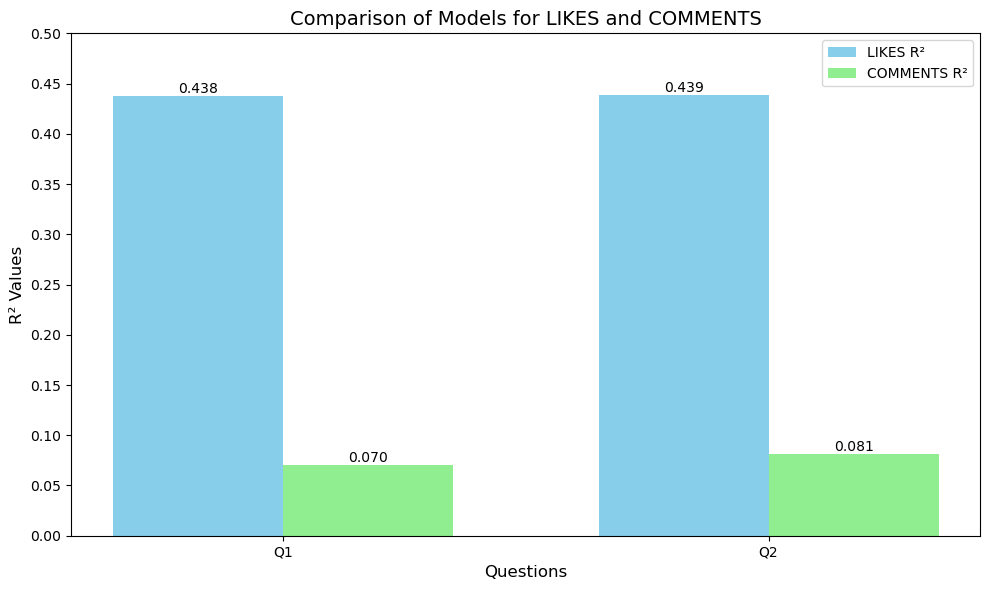

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the R² values
categories = ['Q1', 'Q2']
likes_r2 = [0.438, 0.439]
comments_r2 = [0.070, 0.081]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width and x position for bars
bar_width = 0.35
index = np.arange(len(categories))

# Create the bars for LIKES and COMMENTS R²
bars_likes = ax.bar(index - bar_width/2, likes_r2, bar_width, label='LIKES R²', color='skyblue')
bars_comments = ax.bar(index + bar_width/2, comments_r2, bar_width, label='COMMENTS R²', color='lightgreen')

# Labeling the chart
ax.set_xlabel('Questions', fontsize=12)
ax.set_ylabel('R² Values', fontsize=12)
ax.set_title('Comparison of Models for LIKES and COMMENTS', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(categories)

# Adjust y-axis scale and ticks
ax.set_ylim(0, 0.5)  # Adjust the y-axis range
ax.yaxis.set_ticks(np.arange(0, 0.51, 0.05))  # Set ticks with intervals of 0.05

# Add the legend
ax.legend()

# Add value labels on top of each bar
for bar in bars_likes:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

for bar in bars_comments:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

Model Comparison - RMSE

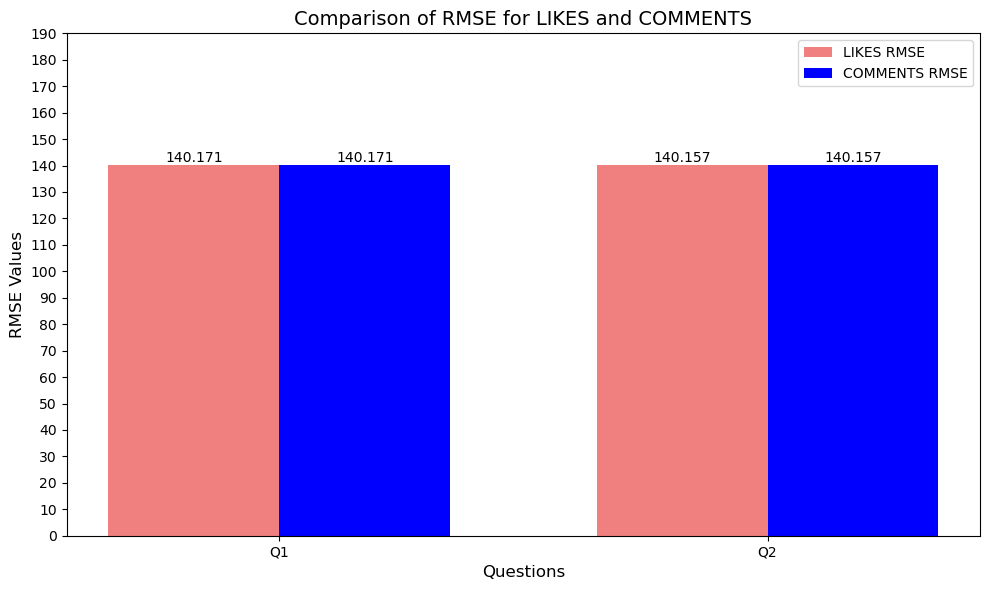

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the RMSE values
rmse_likes = [140.171, 140.157]
rmse_comments = [140.171, 140.157]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width and x position for bars
bar_width = 0.35
index = np.arange(len(categories))

# Create the bars for LIKES and COMMENTS RMSE
bars_likes_rmse = ax.bar(index - bar_width/2, rmse_likes, bar_width, label='LIKES RMSE', color='lightcoral')
bars_comments_rmse = ax.bar(index + bar_width/2, rmse_comments, bar_width, label='COMMENTS RMSE', color='blue')

# Labeling the chart
ax.set_xlabel('Questions', fontsize=12)
ax.set_ylabel('RMSE Values', fontsize=12)
ax.set_title('Comparison of RMSE for LIKES and COMMENTS', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(categories)

# Adjust y-axis scale and ticks
ax.set_ylim(0, 141)  # Adjust the y-axis range to fit the RMSE values
ax.yaxis.set_ticks(np.arange(0, 200, 10))  # Set ticks with intervals of 0.1

# Add the legend
ax.legend()

# Add value labels on top of each bar for RMSE
for bar in bars_likes_rmse:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

for bar in bars_comments_rmse:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

Checking the original dataframe

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 19680
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   USERNAME                   19675 non-null  object        
 1   FOLLOWERS                  19675 non-null  int64         
 2   FOLLOWING                  19675 non-null  int64         
 3   LIKES                      19675 non-null  int64         
 4   COMMENTS                   19675 non-null  int64         
 5   TEXT                       19675 non-null  object        
 6   DATE                       19675 non-null  datetime64[ns]
 7   Number_of_Users_in_Post    19675 non-null  int32         
 8   LINK                       19675 non-null  object        
 9   number_of_tags             19675 non-null  int64         
 10  number_of_mentions         19675 non-null  int64         
 11  Month                      19675 non-null  int32         
 12  Text_Leng

Creating day of the week column

In [77]:
df['Day_of_Week'] = df['DATE'].dt.day_name()

Checking the records to see if they are populated

In [78]:
df.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,DATE,Number_of_Users_in_Post,LINK,number_of_tags,...,Month_Name_March,Month_Name_May,Month_Name_November,Month_Name_October,Month_Name_September,question_mark_count,exclamation_mark_count,engagement_keywords_count,emoji_count,Day_of_Week
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2017-02-11 11:05:10,1,https://www.instagram.com/p/BQXZpSQjiPj,2,...,0,0,0,0,0,0,0,0,0,Saturday
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,2017-02-11 00:33:10,1,https://www.instagram.com/p/BQWRUV6j8b-,3,...,0,0,0,0,0,0,10,0,0,Saturday
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,2017-02-09 15:51:47,3,https://www.instagram.com/p/BQSw2wMj0Bw,7,...,0,0,0,0,0,0,0,0,0,Thursday
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2017-02-08 18:21:57,3,https://www.instagram.com/p/BQQdPrLDeRz,2,...,0,0,0,0,0,0,0,0,0,Wednesday
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,2017-02-08 13:03:14,0,https://www.instagram.com/p/BQP4xY7jAXb,4,...,0,0,0,0,0,0,0,0,0,Wednesday


Creating the Is_Weekend columns to identify weekends

In [79]:
df['Is_Weekend'] = df['Day_of_Week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

Checking the records

In [81]:
df.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,DATE,Number_of_Users_in_Post,LINK,number_of_tags,...,Month_Name_May,Month_Name_November,Month_Name_October,Month_Name_September,question_mark_count,exclamation_mark_count,engagement_keywords_count,emoji_count,Day_of_Week,Is_Weekend
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2017-02-11 11:05:10,1,https://www.instagram.com/p/BQXZpSQjiPj,2,...,0,0,0,0,0,0,0,0,Saturday,1
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,2017-02-11 00:33:10,1,https://www.instagram.com/p/BQWRUV6j8b-,3,...,0,0,0,0,0,10,0,0,Saturday,1
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,2017-02-09 15:51:47,3,https://www.instagram.com/p/BQSw2wMj0Bw,7,...,0,0,0,0,0,0,0,0,Thursday,0
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2017-02-08 18:21:57,3,https://www.instagram.com/p/BQQdPrLDeRz,2,...,0,0,0,0,0,0,0,0,Wednesday,0
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,2017-02-08 13:03:14,0,https://www.instagram.com/p/BQP4xY7jAXb,4,...,0,0,0,0,0,0,0,0,Wednesday,0


Linear Regression - LIKES (Q3 - Unstandardized)

In [82]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV) and independent variables (IVs)
IVs = df[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night','Is_Weekend','Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September']]
DV = df[['LIKES']]

# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     730.4
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:00:25   Log-Likelihood:            -1.9194e+05
No. Observations:               19675   AIC:                         3.839e+05
Df Residuals:                   19653   BIC:                         3.841e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Linear Regression - LIKES (Q3 - Standardized)

In [85]:
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = df[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Is_Weekend', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September']]
DV = df[['LIKES']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     730.4
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:13:53   Log-Likelihood:                -22243.
No. Observations:               19675   AIC:                         4.453e+04
Df Residuals:                   19653   BIC:                         4.470e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -8

Significant Variables - Coefficient (Q3 LIKES)

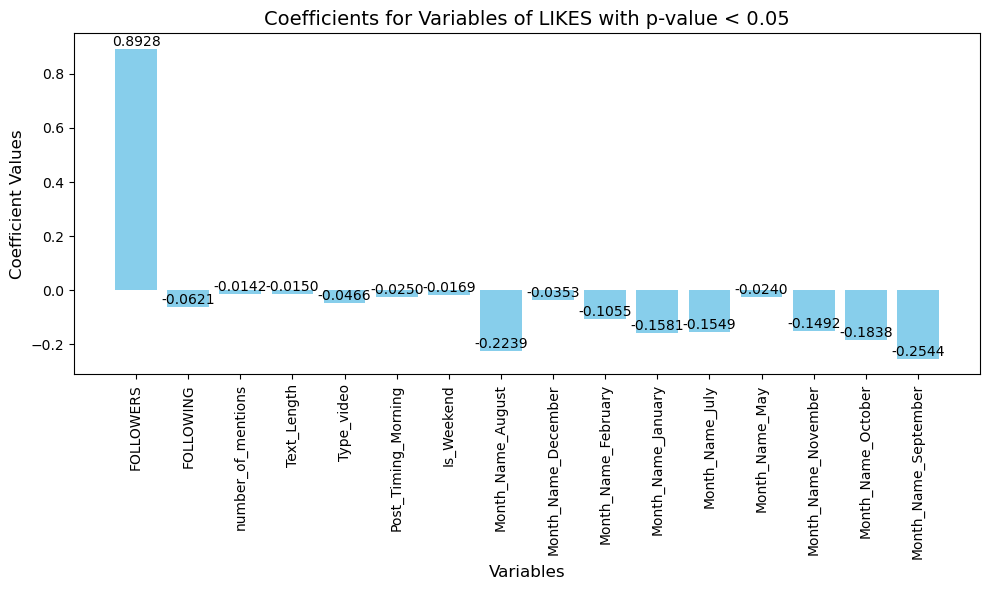

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the coefficients and p-values
variables = [
    'FOLLOWERS', 'FOLLOWING', 'number_of_mentions', 'Text_Length', 'Type_video',
    'Post_Timing_Morning', 'Is_Weekend', 'Month_Name_August', 'Month_Name_December', 
    'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_May',
    'Month_Name_November', 'Month_Name_October', 'Month_Name_September'
]

# Corresponding coefficients for the variables with p-value < 0.05
coefficients = [
    0.8928, -0.0621, -0.0142, -0.0150, -0.0466, -0.0250, -0.0169, 
    -0.2239, -0.0353, -0.1055, -0.1581, -0.1549, -0.0240, -0.1492, 
    -0.1838, -0.2544
]

# Corresponding p-values for the variables with p-value < 0.05
p_values = [
    0.000, 0.000, 0.012, 0.031, 0.000, 0.000, 0.002, 
    0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 
    0.000, 0.000
]

# Filter for variables with p-value < 0.05
filtered_vars = [var for var, p in zip(variables, p_values) if p < 0.05]
filtered_coefs = [coef for coef, p in zip(coefficients, p_values) if p < 0.05]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a vertical bar chart for coefficients
bars = ax.bar(filtered_vars, filtered_coefs, color='skyblue')

# Add labels for the coefficients on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=10)

# Labeling the chart
ax.set_ylabel('Coefficient Values', fontsize=12)
ax.set_xlabel('Variables', fontsize=12)
ax.set_title('Coefficients for Variables of LIKES with p-value < 0.05', fontsize=14)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

Linear Regression - COMMENTS (Q3 - Unstandardized)

In [83]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV) and independent variables (IVs)
IVs = df[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night','Is_Weekend', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September']]
DV = df[['COMMENTS']]

# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     70.24
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          1.13e-288
Time:                        14:00:33   Log-Likelihood:            -1.4732e+05
No. Observations:               19675   AIC:                         2.947e+05
Df Residuals:                   19653   BIC:                         2.949e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Linear Regression - COMMENTS (Q3 - Standardized)

In [86]:
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = df[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Is_Weekend', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September']]
DV = df[['COMMENTS']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     70.24
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          1.13e-288
Time:                        14:14:55   Log-Likelihood:                -27206.
No. Observations:               19675   AIC:                         5.446e+04
Df Residuals:                   19653   BIC:                         5.463e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -4

Significant Variables - Coefficient (Q3 COMMENTS)

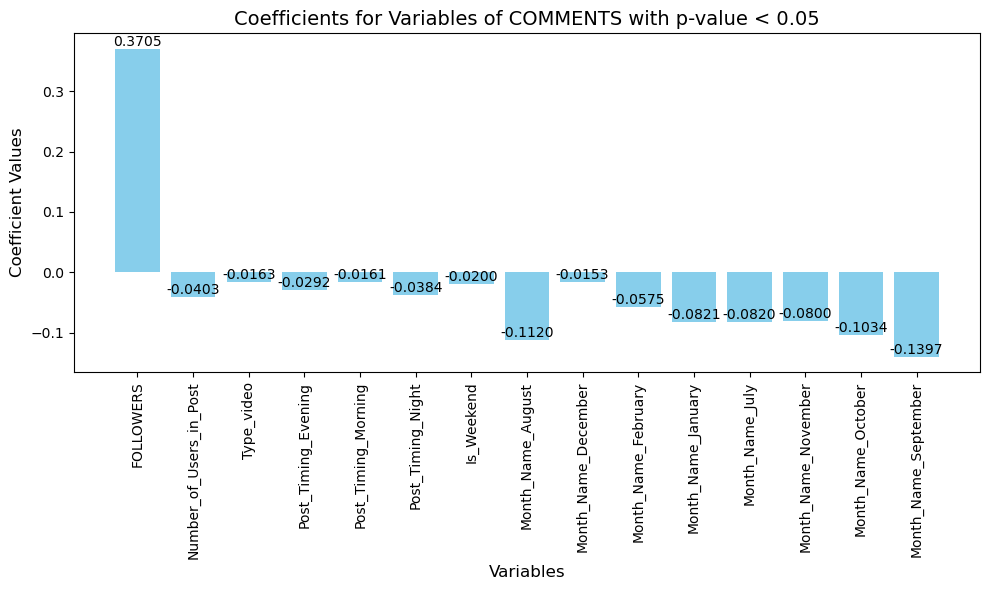

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the coefficients and p-values
variables = [
    'FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 
    'number_of_mentions', 'Text_Length', 'Type_video', 'Post_Timing_Evening', 
    'Post_Timing_Morning', 'Post_Timing_Night', 'Is_Weekend', 'Month_Name_August', 
    'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 
    'Month_Name_July', 'Month_Name_March', 'Month_Name_May', 'Month_Name_November', 
    'Month_Name_October', 'Month_Name_September'
]

# Corresponding coefficients for the variables with p-value < 0.05
coefficients = [
    0.3705, -0.0026, -0.0403, -0.0121, 0.0016, 0.0167, -0.0163, -0.0292, -0.0161, 
    -0.0384, -0.0200, -0.1120, -0.0153, -0.0575, -0.0821, -0.0820, -5.345e-07, 
    -0.0130, -0.0800, -0.1034, -0.1397
]

# Corresponding p-values for the variables with p-value < 0.05
p_values = [
    0.000, 0.713, 0.000, 0.169, 0.828, 0.063, 0.020, 0.001, 0.040, 
    0.000, 0.004, 0.000, 0.027, 0.000, 0.000, 0.000, 1.000, 0.063, 
    0.000, 0.000, 0.000
]

# Filter for variables with p-value < 0.05
filtered_vars = [var for var, p in zip(variables, p_values) if p < 0.05]
filtered_coefs = [coef for coef, p in zip(coefficients, p_values) if p < 0.05]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a vertical bar chart for coefficients
bars = ax.bar(filtered_vars, filtered_coefs, color='skyblue')

# Add labels for the coefficients on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=10)

# Labeling the chart
ax.set_ylabel('Coefficient Values', fontsize=12)
ax.set_xlabel('Variables', fontsize=12)
ax.set_title('Coefficients for Variables of COMMENTS with p-value < 0.05', fontsize=14)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

Creating the micro and macro influencer dataframes

Q1 and Q3 (Model Comparison) - R square

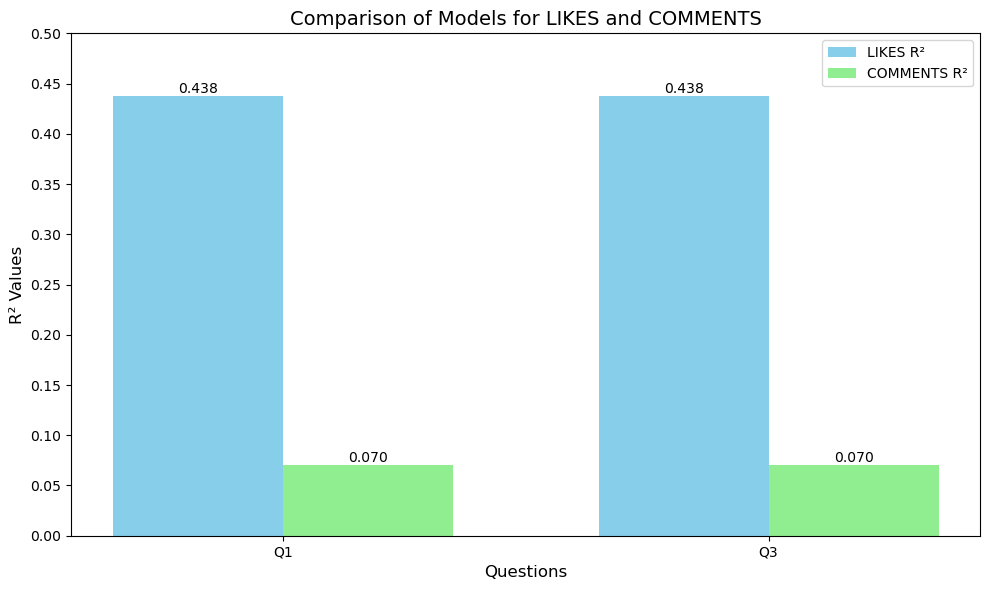

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the R² values
categories = ['Q1', 'Q3']
likes_r2 = [0.438, 0.438]
comments_r2 = [0.070, 0.070]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width and x position for bars
bar_width = 0.35
index = np.arange(len(categories))

# Create the bars for LIKES and COMMENTS R²
bars_likes = ax.bar(index - bar_width/2, likes_r2, bar_width, label='LIKES R²', color='skyblue')
bars_comments = ax.bar(index + bar_width/2, comments_r2, bar_width, label='COMMENTS R²', color='lightgreen')

# Labeling the chart
ax.set_xlabel('Questions', fontsize=12)
ax.set_ylabel('R² Values', fontsize=12)
ax.set_title('Comparison of Models for LIKES and COMMENTS', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(categories)

# Adjust y-axis scale and ticks
ax.set_ylim(0, 0.5)  # Adjust the y-axis range
ax.yaxis.set_ticks(np.arange(0, 0.51, 0.05))  # Set ticks with intervals of 0.05

# Add the legend
ax.legend()

# Add value labels on top of each bar
for bar in bars_likes:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

for bar in bars_comments:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

Q1 and Q3 (Model Comparison) - RMSE

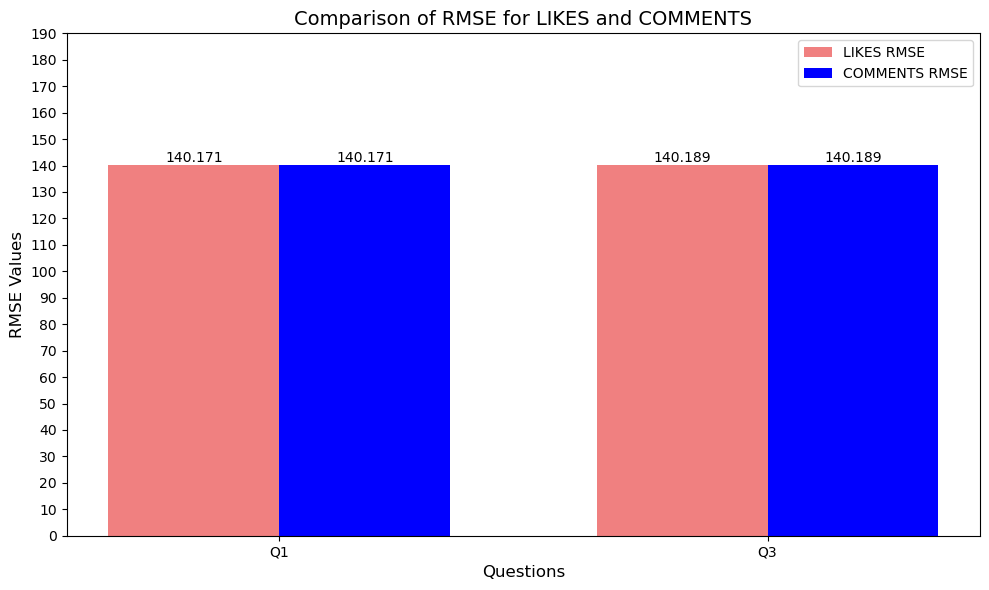

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the RMSE values
rmse_likes = [140.171, 140.189]
rmse_comments = [140.171, 140.189]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width and x position for bars
bar_width = 0.35
index = np.arange(len(categories))

# Create the bars for LIKES and COMMENTS RMSE
bars_likes_rmse = ax.bar(index - bar_width/2, rmse_likes, bar_width, label='LIKES RMSE', color='lightcoral')
bars_comments_rmse = ax.bar(index + bar_width/2, rmse_comments, bar_width, label='COMMENTS RMSE', color='blue')

# Labeling the chart
ax.set_xlabel('Questions', fontsize=12)
ax.set_ylabel('RMSE Values', fontsize=12)
ax.set_title('Comparison of RMSE for LIKES and COMMENTS', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(categories)

# Adjust y-axis scale and ticks
ax.set_ylim(0, 141)  # Adjust the y-axis range to fit the RMSE values
ax.yaxis.set_ticks(np.arange(0, 200, 10))  # Set ticks with intervals of 0.1

# Add the legend
ax.legend()

# Add value labels on top of each bar for RMSE
for bar in bars_likes_rmse:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

for bar in bars_comments_rmse:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

In [96]:
micro_influencers = df_new[df_new['FOLLOWERS'] < 50000]
macro_influencers = df_new[df_new['FOLLOWERS'] >= 50000]

Linear Regression (micro_influencers) - LIKES (Q4 Unstandardized)

In [56]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV) and independent variables (IVs)
IVs = micro_influencers[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count','engagement_keywords_count','emoji_count', 'exclamation_mark_count']]
DV = micro_influencers[['LIKES']]

# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     56.51
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          5.99e-268
Time:                        17:32:01   Log-Likelihood:            -1.1405e+05
No. Observations:               13134   AIC:                         2.282e+05
Df Residuals:                   13108   BIC:                         2.284e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Linear Regression (micro_influencers) - LIKES (Q4 standardized)

In [88]:
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = micro_influencers[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count','exclamation_mark_count','engagement_keywords_count','emoji_count']]
DV = micro_influencers[['LIKES']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)
# Fill missing values for specific columns
IVs_with_const['Month_Name_August'] = IVs_with_const['Month_Name_August'].fillna(0)  # Replace NaN with 0
IVs_with_const['Month_Name_July'] = IVs_with_const['Month_Name_July'].fillna(0)
IVs_with_const['Month_Name_November'] = IVs_with_const['Month_Name_November'].fillna(0)
IVs_with_const['Month_Name_September'] = IVs_with_const['Month_Name_September'].fillna(0)
IVs_with_const['Month_Name_October'] = IVs_with_const['Month_Name_October'].fillna(0)
# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     56.51
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          5.99e-268
Time:                        18:42:16   Log-Likelihood:                -17964.
No. Observations:               13134   AIC:                         3.598e+04
Df Residuals:                   13108   BIC:                         3.617e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

OLS Regression Coefficients of LIKES for Micro Influencers (p-value < 0.05)

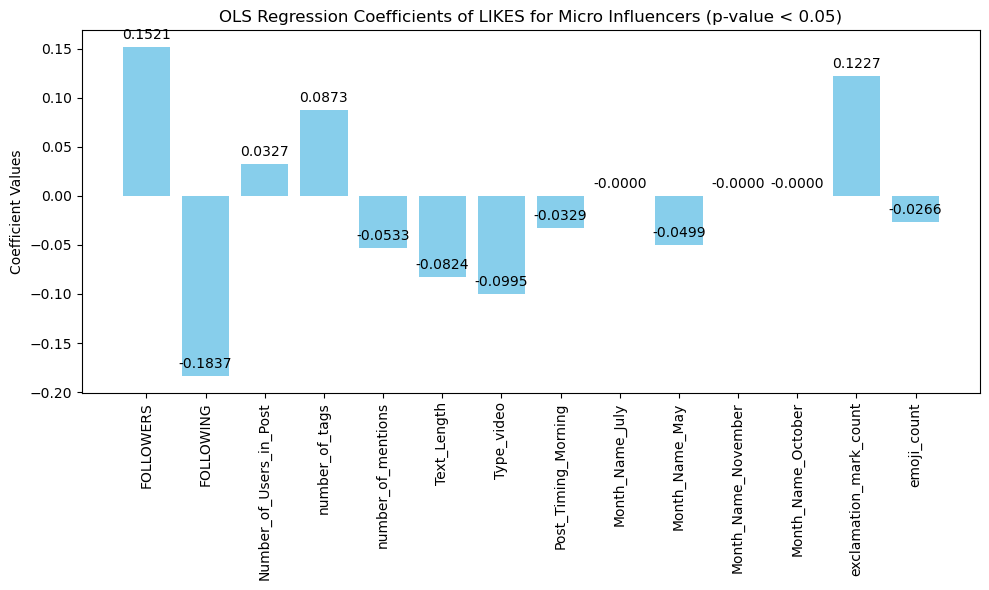

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Example data from the OLS regression output (coef and p-values)
coefficients = {
    'FOLLOWERS': 0.1521,
    'FOLLOWING': -0.1837,
    'Number_of_Users_in_Post': 0.0327,
    'number_of_tags': 0.0873,
    'number_of_mentions': -0.0533,
    'Text_Length': -0.0824,
    'Type_video': -0.0995,
    'Post_Timing_Morning': -0.0329,
    'Month_Name_July': -3.246e-17,
    'Month_Name_May': -0.0499,
    'Month_Name_November': -5.142e-18,
    'Month_Name_October': -2.292e-18,
    'exclamation_mark_count': 0.1227,
    'emoji_count': -0.0266
}

p_values = {
    'FOLLOWERS': 0.000,
    'FOLLOWING': 0.000,
    'Number_of_Users_in_Post': 0.000,
    'number_of_tags': 0.000,
    'number_of_mentions': 0.000,
    'Text_Length': 0.000,
    'Type_video': 0.000,
    'Post_Timing_Morning': 0.001,
    'Month_Name_July': 0.000,
    'Month_Name_May': 0.000,
    'Month_Name_November': 0.000,
    'Month_Name_October': 0.017,
    'exclamation_mark_count': 0.000,
    'emoji_count': 0.002
}

# Filter out variables with p-values greater than 0.05
filtered_coefficients = {var: coef for var, coef in coefficients.items() if p_values[var] < 0.05}
filtered_p_values = {var: p for var, p in p_values.items() if p < 0.05}

# Plot bar graph (vertical)
variables = list(filtered_coefficients.keys())
coef_values = list(filtered_coefficients.values())

# Create a vertical bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(variables, coef_values, color='skyblue')

# Add labels on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, 
             f'{bar.get_height():.4f}', va='bottom', ha='center', color='black')

plt.ylabel('Coefficient Values')
plt.title('OLS Regression Coefficients of LIKES for Micro Influencers (p-value < 0.05)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

Linear Regression (micro influencers) - COMMENTS (Q4 unstandardized)

In [89]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV) and independent variables (IVs)
IVs = micro_influencers[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count','engagement_keywords_count','emoji_count', 'exclamation_mark_count']]
DV = micro_influencers[['COMMENTS']]

# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.063
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           2.79e-29
Time:                        18:47:47   Log-Likelihood:                -76757.
No. Observations:               13134   AIC:                         1.536e+05
Df Residuals:                   13108   BIC:                         1.538e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Linear Regression (micro influencers) - COMMENTS (Q4 standardized)

In [91]:
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = micro_influencers[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count','exclamation_mark_count','engagement_keywords_count','emoji_count']]
DV = micro_influencers[['COMMENTS']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)
# Fill missing values for specific columns
IVs_with_const['Month_Name_August'] = IVs_with_const['Month_Name_August'].fillna(0)  # Replace NaN with 0
IVs_with_const['Month_Name_July'] = IVs_with_const['Month_Name_July'].fillna(0)
IVs_with_const['Month_Name_November'] = IVs_with_const['Month_Name_November'].fillna(0)
IVs_with_const['Month_Name_September'] = IVs_with_const['Month_Name_September'].fillna(0)
IVs_with_const['Month_Name_October'] = IVs_with_const['Month_Name_October'].fillna(0)
# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.063
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           2.79e-29
Time:                        18:51:19   Log-Likelihood:                -18536.
No. Observations:               13134   AIC:                         3.712e+04
Df Residuals:                   13108   BIC:                         3.732e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

OLS Regression Coefficients of COMMENTS for micro influencers (p-value < 0.05)

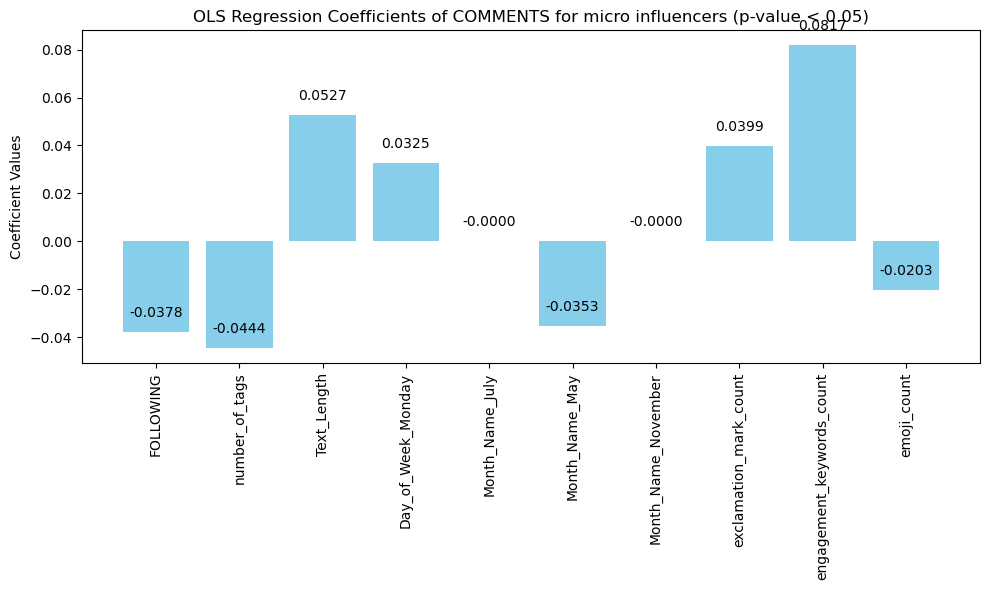

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Coefficients and p-values from your OLS regression output
coefficients = {
    'FOLLOWERS': 0.0172,
    'FOLLOWING': -0.0378,
    'number_of_tags': -0.0444,
    'Text_Length': 0.0527,
    'Day_of_Week_Monday': 0.0325,
    'Month_Name_July': -1.004e-17,
    'Month_Name_May': -0.0353,
    'Month_Name_November': -1.406e-18,
    'exclamation_mark_count': 0.0399,
    'engagement_keywords_count': 0.0817,
    'emoji_count': -0.0203
}

p_values = {
    'FOLLOWERS': 0.061,
    'FOLLOWING': 0.000,
    'number_of_tags': 0.000,
    'Text_Length': 0.000,
    'Day_of_Week_Monday': 0.009,
    'Month_Name_July': 0.000,
    'Month_Name_May': 0.001,
    'Month_Name_November': 0.004,
    'exclamation_mark_count': 0.000,
    'engagement_keywords_count': 0.000,
    'emoji_count': 0.026
}

# Filter out variables with p-values greater than 0.05
filtered_coefficients = {var: coef for var, coef in coefficients.items() if p_values[var] < 0.05}
filtered_p_values = {var: p for var, p in p_values.items() if p < 0.05}

# Plot bar graph (vertical)
variables = list(filtered_coefficients.keys())
coef_values = list(filtered_coefficients.values())

# Create a vertical bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(variables, coef_values, color='skyblue')

# Add labels on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, 
             f'{bar.get_height():.4f}', va='bottom', ha='center', color='black')

plt.ylabel('Coefficient Values')
plt.title('OLS Regression Coefficients of COMMENTS for micro influencers (p-value < 0.05)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

Linear Regression (Macro influencers) - LIKES (Q4 unstandardized)

In [93]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV) and independent variables (IVs)
IVs = macro_influencers[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count','engagement_keywords_count','emoji_count', 'exclamation_mark_count']]
DV = macro_influencers[['LIKES']]

# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     163.3
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:56:45   Log-Likelihood:                -66942.
No. Observations:                6541   AIC:                         1.339e+05
Df Residuals:                    6511   BIC:                         1.341e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Linear Regression (Macro Influencers) - LIKES (Q4 Standardized)

In [97]:
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = macro_influencers[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count','exclamation_mark_count','engagement_keywords_count','emoji_count']]
DV = macro_influencers[['LIKES']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)
# Fill missing values for specific columns
IVs_with_const['Month_Name_August'] = IVs_with_const['Month_Name_August'].fillna(0)  # Replace NaN with 0
IVs_with_const['Month_Name_July'] = IVs_with_const['Month_Name_July'].fillna(0)
IVs_with_const['Month_Name_November'] = IVs_with_const['Month_Name_November'].fillna(0)
IVs_with_const['Month_Name_September'] = IVs_with_const['Month_Name_September'].fillna(0)
IVs_with_const['Month_Name_October'] = IVs_with_const['Month_Name_October'].fillna(0)
IVs_with_const['Month_Name_March'] = IVs_with_const['Month_Name_March'].fillna(0)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LIKES   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     163.3
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:30:28   Log-Likelihood:                -7493.3
No. Observations:                6541   AIC:                         1.505e+04
Df Residuals:                    6511   BIC:                         1.525e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

OLS Regression Coefficients of LIKES for Macro Influencers (p-value < 0.05)

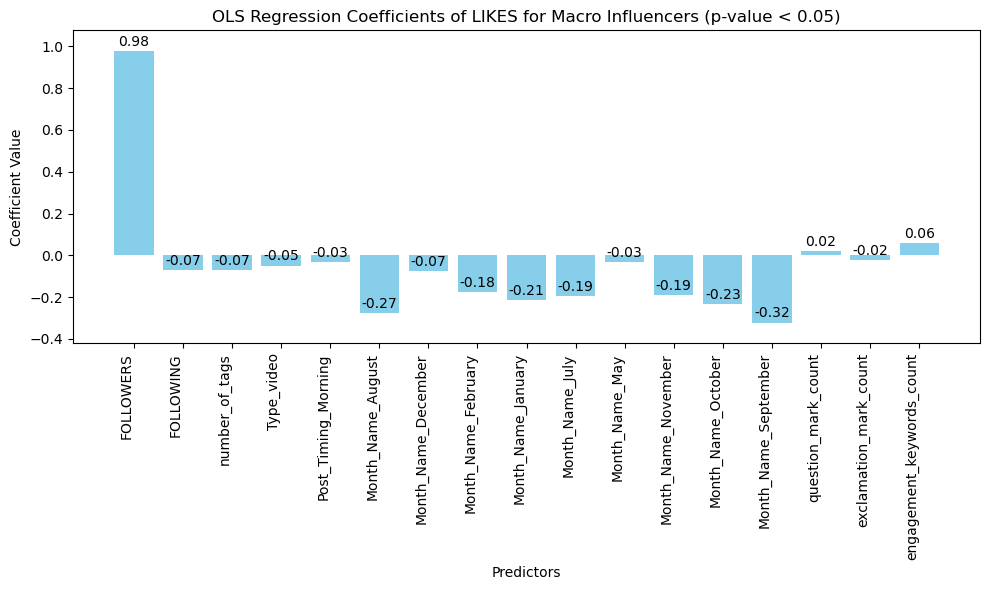

In [112]:
import matplotlib.pyplot as plt

# Data: Coefficients for predictors with p-values less than 0.05
predictors = [
    'FOLLOWERS', 'FOLLOWING', 'number_of_tags', 'Type_video', 'Post_Timing_Morning', 
    'Month_Name_August', 'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 
    'Month_Name_July', 'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 
    'Month_Name_September', 'question_mark_count', 'exclamation_mark_count', 'engagement_keywords_count'
]

coefficients = [
    0.9770, -0.0716, -0.0726, -0.0490, -0.0335, 
    -0.2749, -0.0737, -0.1777, -0.2126, -0.1936, 
    -0.0321, -0.1900, -0.2341, -0.3222, 0.0210, -0.0248, 0.0595
]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(predictors, coefficients, color='skyblue')

# Add labels to each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Adjust y-axis limits to ensure positive and negative values are visible
plt.ylim(min(coefficients) - 0.1, max(coefficients) + 0.1)

# Add labels and title
plt.ylabel('Coefficient Value')
plt.xlabel('Predictors')
plt.title('OLS Regression Coefficients of LIKES for Macro Influencers (p-value < 0.05)')
plt.tight_layout()

# Show the plot
plt.show()

Linear Regression (Macro Influencers) - COMMENTS (Q4 Unstandardized)

In [99]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Define the dependent variable (DV) and independent variables (IVs)
IVs = macro_influencers[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count','engagement_keywords_count','emoji_count', 'exclamation_mark_count']]
DV = macro_influencers[['COMMENTS']]

# Add a constant to the model (for the intercept)
IVs_with_const = sm.add_constant(IVs)

# Fit the linear regression model
model = sm.OLS(DV, IVs_with_const).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     30.66
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          4.59e-157
Time:                        19:37:35   Log-Likelihood:                -52297.
No. Observations:                6541   AIC:                         1.047e+05
Df Residuals:                    6511   BIC:                         1.049e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Linear Regression (Macro Influencers) - COMMENTS (Q4 Standardized)

In [102]:
from scipy.stats.mstats import zscore

# Define the dependent variable (DV) and independent variables (IVs)
IVs = macro_influencers[['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                                            'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday','Day_of_Week_Saturday',
                                            'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                                            'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                                            'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count','exclamation_mark_count','engagement_keywords_count','emoji_count']]
DV = macro_influencers[['COMMENTS']]

# Standardize the dependent variable (DV) and independent variables (IVs)
DV_standardized = zscore(DV)
IVs_standardized = zscore(IVs)

# Add a constant to the standardized independent variables
IVs_with_const = sm.add_constant(IVs_standardized)
# Fill missing values for specific columns

IVs_with_const['Month_Name_March'] = IVs_with_const['Month_Name_March'].fillna(0)

# Fit the OLS model using Statsmodels
standardized_model = sm.OLS(DV_standardized, IVs_with_const).fit()

# Get the summary of the regression results
print(standardized_model.summary())

                            OLS Regression Results                            
Dep. Variable:               COMMENTS   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     30.66
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          4.59e-157
Time:                        19:45:09   Log-Likelihood:                -8862.6
No. Observations:                6541   AIC:                         1.779e+04
Df Residuals:                    6511   BIC:                         1.799e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

OLS Regression Coefficients of COMMENTS with Macro Influencers (p-value < 0.05)

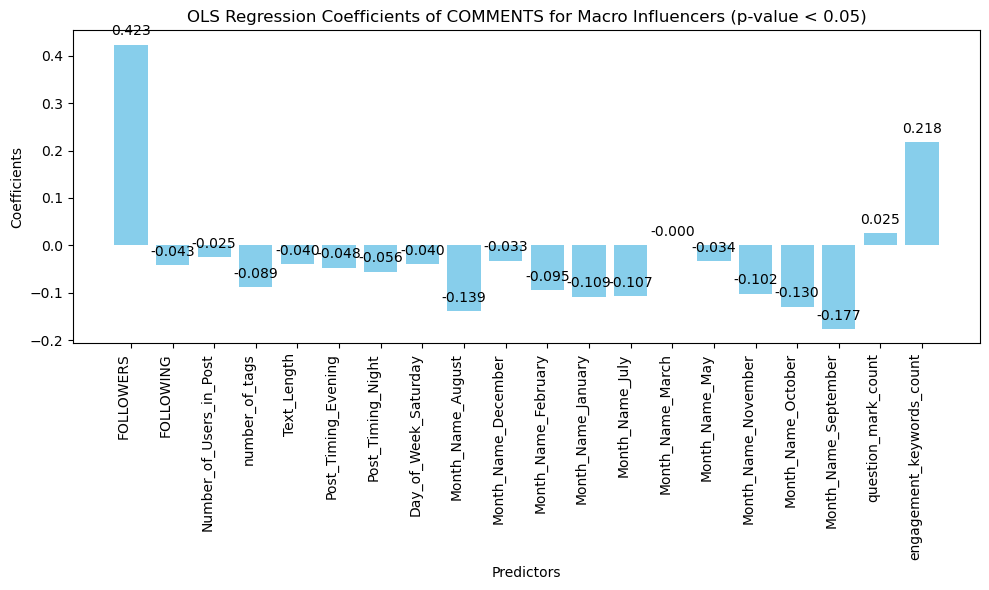

In [111]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example: Create a DataFrame with the coefficients and p-values from the OLS regression output
data = {
    'predictors': ['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions',
                   'Text_Length', 'Type_video', 'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night',
                   'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday',
                   'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August', 'Month_Name_December',
                   'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                   'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September',
                   'question_mark_count', 'exclamation_mark_count', 'engagement_keywords_count', 'emoji_count'],
    'coefficients': [0.4235, -0.0425, -0.0249, -0.0889, -0.0128, -0.0403, -0.0170, -0.0475, -0.0203, -0.0560, 0.0117,
                     -0.0402, -0.0230, -0.0188, -0.0177, -0.0154, -0.1389, -0.0327, -0.0948, -0.1086, -0.1075, -1.039e-17,
                     -0.0336, -0.1024, -0.1297, -0.1770, 0.0254, -0.0206, 0.2178, 0.0055],
    'p_values': [0.000, 0.001, 0.045, 0.000, 0.315, 0.014, 0.153, 0.001, 0.122, 0.000, 0.470, 0.007, 0.131, 0.216,
                 0.218, 0.294, 0.000, 0.005, 0.000, 0.000, 0.000, 0.009, 0.012, 0.000, 0.000, 0.000, 0.032, 0.095, 0.000, 0.637]
}

# Create a DataFrame from the results
df_1 = pd.DataFrame(data)

# Filter for p-values less than 0.05
significant_df_1 = df_1[df_1['p_values'] < 0.05]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(significant_df_1['predictors'], significant_df_1['coefficients'], color='skyblue')

# Add coefficient values on top of the bars
for bar, coef in zip(bars, significant_df_1['coefficients']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{coef:.3f}', ha='center')

# Labeling the graph
plt.title('OLS Regression Coefficients of COMMENTS for Macro Influencers (p-value < 0.05)')
plt.xlabel('Predictors')
plt.ylabel('Coefficients')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Show plot
plt.show()

Comparison of Coefficients: Micro vs Macro Influencers for LIKES

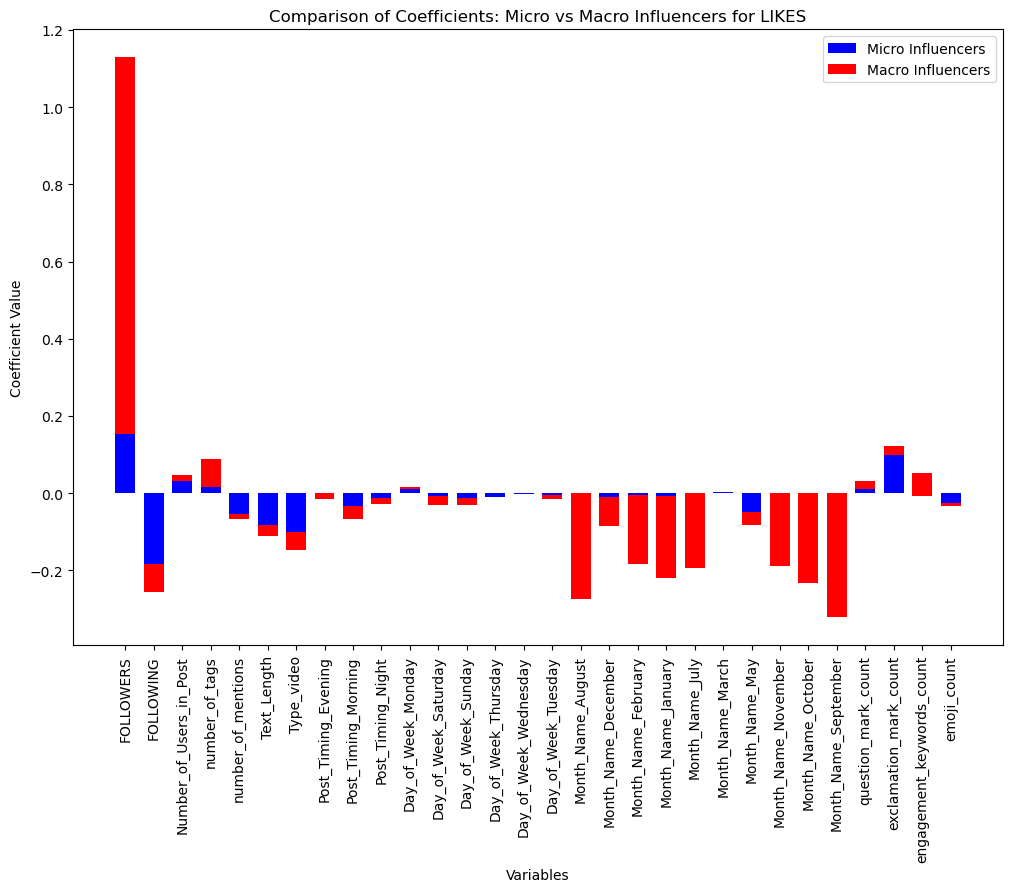

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Coefficients for Micro Influencers (from the OLS regression results)
micro_influencers_data = {
    'Variables': ['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions',
                  'Text_Length', 'Type_video', 'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night',
                  'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 
                  'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August', 'Month_Name_December', 
                  'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March', 
                  'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 
                  'question_mark_count', 'exclamation_mark_count', 'engagement_keywords_count', 'emoji_count'],
    'Micro_Coefficients': [0.1521, -0.1837, 0.0327, 0.0873, -0.0533, -0.0824, -0.0995, 0.0011, -0.0329, -0.0129, 
                           0.0100, -0.0082, -0.0138, -0.0097, -0.0022, -0.0040, -9.18e-19, -0.0103, -0.0055, 
                           -0.0076, -3.246e-17, 0.0025, -0.0499, -5.142e-18, -2.292e-18, 0, 0.0096, 0.1227, 
                           -0.0075, -0.0266]
}

# Coefficients for Macro Influencers (from the OLS regression results)
macro_influencers_data = {
    'Variables': ['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions',
                  'Text_Length', 'Type_video', 'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night',
                  'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 
                  'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August', 'Month_Name_December', 
                  'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March', 
                  'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 
                  'question_mark_count', 'exclamation_mark_count', 'engagement_keywords_count', 'emoji_count'],
    'Macro_Coefficients': [0.9770, -0.0716, 0.0138, -0.0726, -0.0129, -0.0290, -0.0490, -0.0167, -0.0335, -0.0154,
                           0.0053, -0.0234, -0.0163, -0.0010, -0.0010, -0.0109, -0.2749, -0.0737, -0.1777, 
                           -0.2126, -0.1936, 3.671e-19, -0.0321, -0.1900, -0.2341, -0.3222, 0.0210, -0.0248, 
                           0.0595, -0.0077]
}

# Create DataFrames for both Micro and Macro Influencers
df_micro = pd.DataFrame(micro_influencers_data)
df_macro = pd.DataFrame(macro_influencers_data)

# Set up positions for the bars
x = np.arange(len(df_micro['Variables']))  # X-axis positions for each variable
width = 0.70  # Width of each bar

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars for Micro and Macro influencers as stacked bars
ax.bar(x, df_micro['Micro_Coefficients'], width, label='Micro Influencers', color='blue')
ax.bar(x, df_macro['Macro_Coefficients'], width, bottom=df_micro['Micro_Coefficients'], label='Macro Influencers', color='red')

# Adding labels and title
ax.set_xlabel('Variables')
ax.set_ylabel('Coefficient Value')
ax.set_title('Comparison of Coefficients: Micro vs Macro Influencers for LIKES')
ax.set_xticks(x)
ax.set_xticklabels(df_micro['Variables'], rotation=90)
ax.legend()

# Adjust layout to make room for labels
#plt.tight_layout()
plt.show()

Comparison of Coefficients of Micro and Macro Influencers for COMMENTS

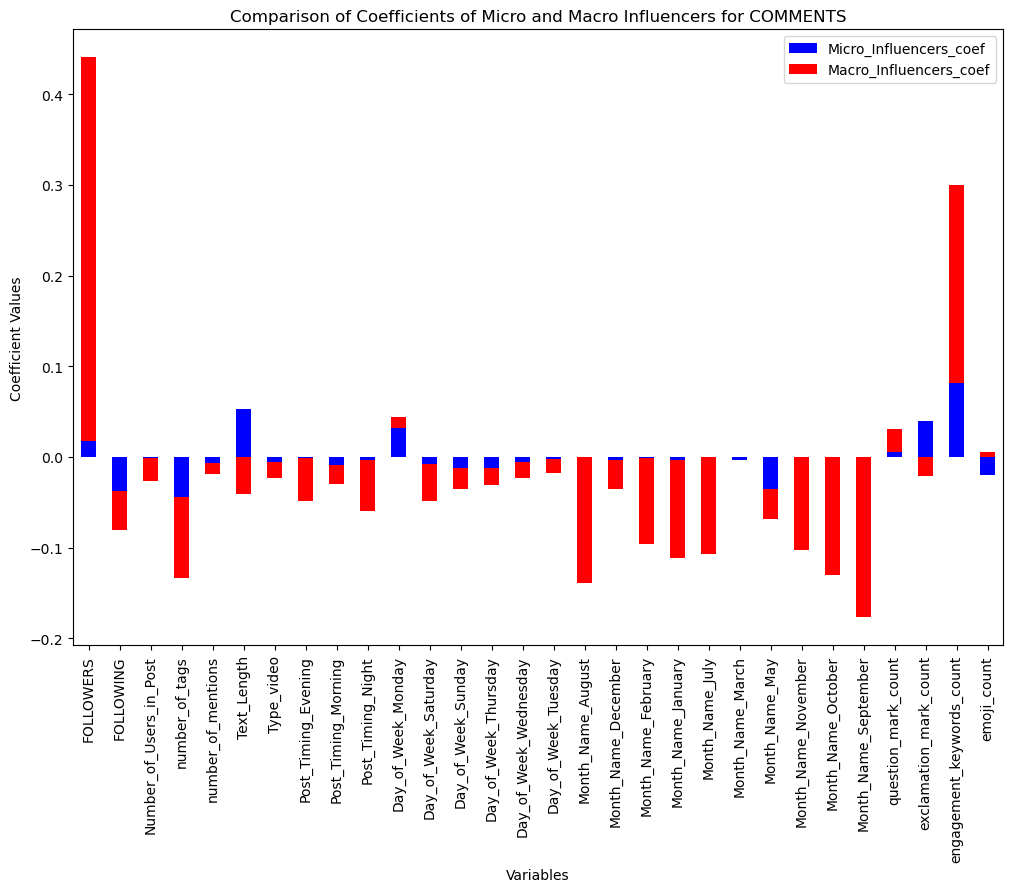

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from your OLS regression results for Micro Influencers and Macro Influencers
# Create a DataFrame to store the coefficients and standard errors
data = {
    'Variable': ['FOLLOWERS', 'FOLLOWING', 'Number_of_Users_in_Post', 'number_of_tags', 'number_of_mentions', 'Text_Length', 'Type_video',
                 'Post_Timing_Evening', 'Post_Timing_Morning', 'Post_Timing_Night', 'Day_of_Week_Monday', 'Day_of_Week_Saturday',
                 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Wednesday', 'Day_of_Week_Tuesday', 'Month_Name_August',
                 'Month_Name_December', 'Month_Name_February', 'Month_Name_January', 'Month_Name_July', 'Month_Name_March',
                 'Month_Name_May', 'Month_Name_November', 'Month_Name_October', 'Month_Name_September', 'question_mark_count',
                 'exclamation_mark_count', 'engagement_keywords_count', 'emoji_count'],
    'Micro_Influencers_coef': [0.0172, -0.0378, -0.0011, -0.0444, -0.0062, 0.0527, -0.0059, -0.0006, -0.0093, -0.0038, 0.0325, -0.0080, -0.0119, -0.0118,
                               -0.0053, -0.0025, 3.896e-18, -0.0030, -0.0015, -0.0033, -1.004e-17, -0.0033, -0.0353, -1.406e-18, -3.425e-19, 0,
                               0.0054, 0.0399, 0.0817, -0.0203],
    'Macro_Influencers_coef': [0.4235, -0.0425, -0.0249, -0.0889, -0.0128, -0.0403, -0.0170, -0.0475, -0.0203, -0.0560, 0.0117, -0.0402, -0.0230, -0.0188,
                               -0.0177, -0.0154, -0.1389, -0.0327, -0.0948, -0.1086, -0.1075, -1.039e-17, -0.0336, -0.1024, -0.1297, -0.1770, 0.0254,
                               -0.0206, 0.2178, 0.0055]
}

df_2 = pd.DataFrame(data)

# Set the Variable as the index
df_2.set_index('Variable', inplace=True)

# Plot a stacked bar chart for the coefficients of Micro Influencers and Macro Influencers
ax = df_2.plot(kind='bar', stacked=True, figsize=(12, 8), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Coefficient Values')
plt.title('Comparison of Coefficients of Micro and Macro Influencers for COMMENTS')
plt.xticks(rotation=90)

# Display the plot
plt.show()